In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes = True)
sns.set(style = "ticks")
sns.set_palette("colorblind")
sns.set_context("talk", font_scale=0.85)

# To suppress all warnings
import warnings
warnings.filterwarnings("ignore")

## Import local self-written functions

In [2]:
from correction_functions1 import (cation_mol_pct, wt_pct, eq_ol_cpx, outlier_filt, regression_fig, evolution_fig, crystal_fract_corr)

## Import data

In [3]:
# import data
OIB_df = pd.read_csv('OIB_majors_filtered.csv')

# showcase df
OIB_df.head()

SiO2      TiO2      Al2O3        FeO       MnO       MgO        CaO  \
0  47.166784  3.450005  15.284325  12.125163  0.240698  5.124862  10.761208   
1  47.206030  3.618090  15.045226  11.778894  0.221106  5.326633  10.733668   
2  49.152370  3.299157  15.409603  11.166379  0.213176  4.628972   8.192062   
3  48.277609  4.417427  13.049645  14.903749  0.222898  5.005066   9.665653   
4  48.724155  4.346949  12.960161  14.704992  0.221886  4.992436   9.450328   

       Na2O       K2O      P2O5     Island      Group     Ocean  
0  3.028783  2.417009  0.401163  Jan Mayen  Jan Mayen  Atlantic  
1  3.276382  2.211055  0.582915  Jan Mayen  Jan Mayen  Atlantic  
2  3.847325  2.771292  1.319663  Jan Mayen  Jan Mayen  Atlantic  
3  3.181358  0.800405  0.476190  Jan Mayen  Jan Mayen  Atlantic  
4  3.237519  0.917801  0.443772  Jan Mayen  Jan Mayen  Atlantic

In [4]:
# showcase islands by data count
OIB_df['Group'].value_counts()

Group
Canary              789
Hawaii              613
Cape Verde          553
Azores              480
Mascarene           225
Austral-Cook        163
Samoa               151
Iceland             132
Marquesas           124
Jan Mayen           123
Society              96
Galapagos            82
Cameroon             78
Madeira              56
St. Helena           52
Caroline             51
Kerguelen            49
Crozet               45
Heard                40
Gough                40
Juan Fernandez       36
Tristan da Cunha     34
Pitcairn-Gambier     27
Trindade             15
Balleny              11
Easter                5
Name: count, dtype: int64

## Separately consider each archipelago and island within that archipelago:
1. Identify which islands have statistically significant relationships in a CaO/Al2O3 vs. MgO plot
2. Vary the olivine/cpx ratio in the crystallizing assemblage to match the slope, using:
    - `crystal_fract_corr()`, where the last two arguments define the relative amounts of ol and cpx, respectively (ol should always = 1)
    - `evolution_fig()` to visualize the correction and to make sure the LLDs match the determined slope

## 1. Hawaii

In [5]:
# define hawaii dataframe
hawaii = OIB_df[OIB_df['Group']=='Hawaii']

# show value counts
hawaii['Island'].value_counts()

Island
Kauai        148
Hawaii       120
Oahu          96
Niihau        79
Kaula         78
Maui          74
Molokai       16
Kahoolawe      2
Name: count, dtype: int64

In [6]:
# filter outliers
filt = outlier_filt(hawaii)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Kauai      146
Hawaii     102
Oahu        91
Maui        70
Kaula       66
Niihau      64
Molokai     13
Name: count, dtype: int64

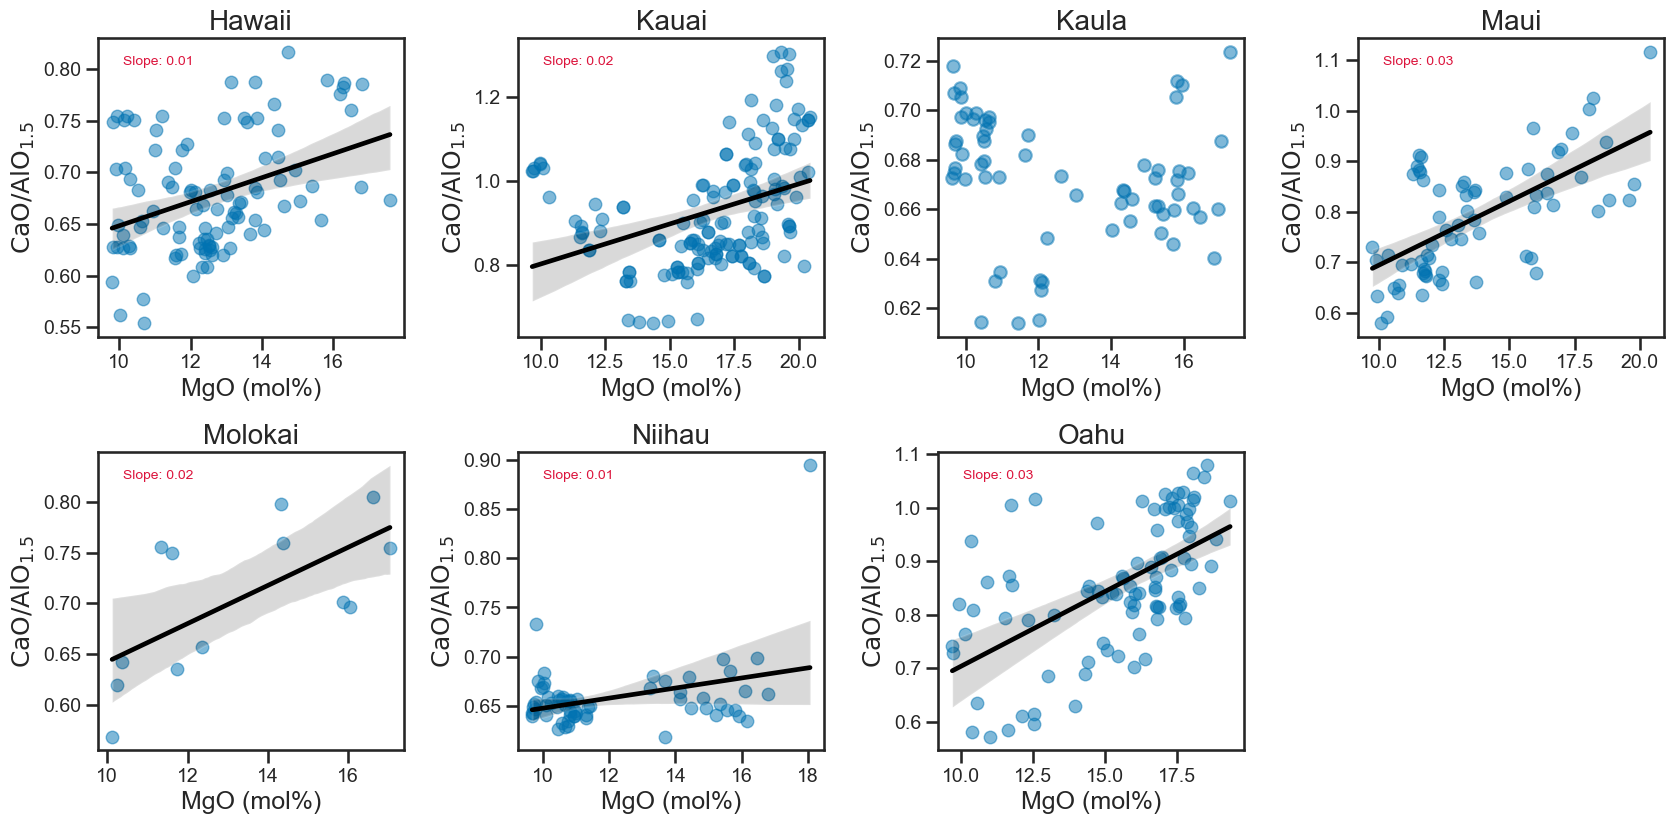

In [7]:
# plot regression figure
regression_fig(filt)

In [8]:
# correct islands without a cpx component (i.e., no coherent slope)
kaula_df, kaula_melt = crystal_fract_corr(filt[filt['Island']=='Kaula'], 1, 0)
niihau_df, niihau_melt = crystal_fract_corr(filt[filt['Island']=='Niihau'], 1, 0)

Mineral abundance in crystallizing assemblage: olivine = 100.0 %; cpx = 0.0 %
Mineral abundance in crystallizing assemblage: olivine = 100.0 %; cpx = 0.0 %


Mineral abundance in crystallizing assemblage: olivine = 83.3 %; cpx = 16.7 %


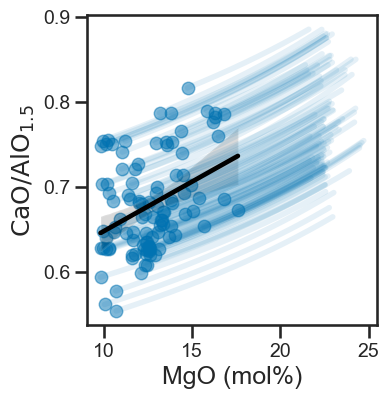

In [12]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
hawaii_df, hawaii_melt = crystal_fract_corr(filt[filt['Island']=='Hawaii'], 1, 0.2)
evolution_fig(filt[filt['Island']=='Hawaii'], hawaii_melt)

Mineral abundance in crystallizing assemblage: olivine = 80.0 %; cpx = 20.0 %


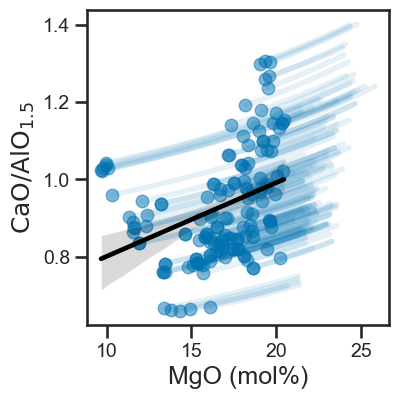

In [13]:
kauai_df, kauai_melt = crystal_fract_corr(filt[filt['Island']=='Kauai'], 1, 0.25)
evolution_fig(filt[filt['Island']=='Kauai'], kauai_melt)

Mineral abundance in crystallizing assemblage: olivine = 69.0 %; cpx = 31.0 %


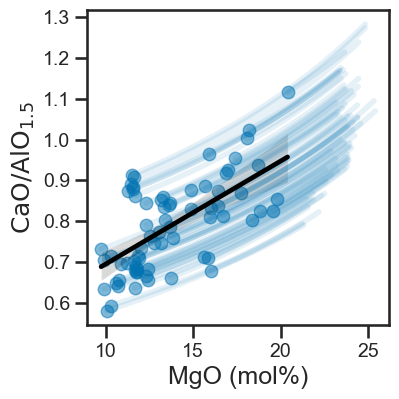

In [14]:
maui_df, maui_melt = crystal_fract_corr(filt[filt['Island']=='Maui'], 1, 0.45)
evolution_fig(filt[filt['Island']=='Maui'], maui_melt)

Mineral abundance in crystallizing assemblage: olivine = 69.0 %; cpx = 31.0 %


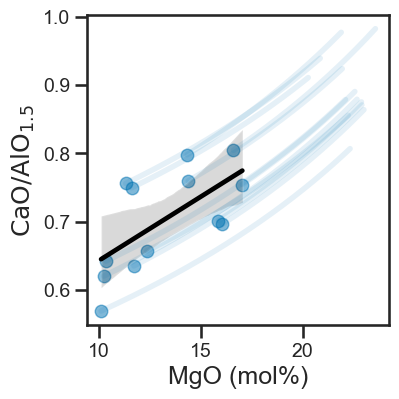

In [15]:
molokai_df, molokai_melt = crystal_fract_corr(filt[filt['Island']=='Molokai'], 1, 0.45)
evolution_fig(filt[filt['Island']=='Molokai'], molokai_melt)

Mineral abundance in crystallizing assemblage: olivine = 66.7 %; cpx = 33.3 %


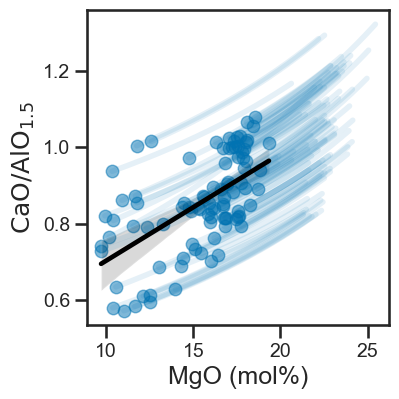

In [16]:
oahu_df, oahu_melt = crystal_fract_corr(filt[filt['Island']=='Oahu'], 1, 0.5)
evolution_fig(filt[filt['Island']=='Oahu'], oahu_melt)

## 2. Canary

In [15]:
# define hawaii dataframe
canary = OIB_df[OIB_df['Group']=='Canary']

# show value counts
canary['Island'].value_counts()

Island
La Palma         253
Tenerife         145
Lanzarote        125
El Hierro         98
Gran Canaria      93
Fuerteventura     66
La Gomera          9
Name: count, dtype: int64

In [16]:
# filter outliers
filt = outlier_filt(canary)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
La Palma         238
Tenerife         142
Lanzarote        124
El Hierro         95
Gran Canaria      92
Fuerteventura     62
La Gomera          7
Name: count, dtype: int64

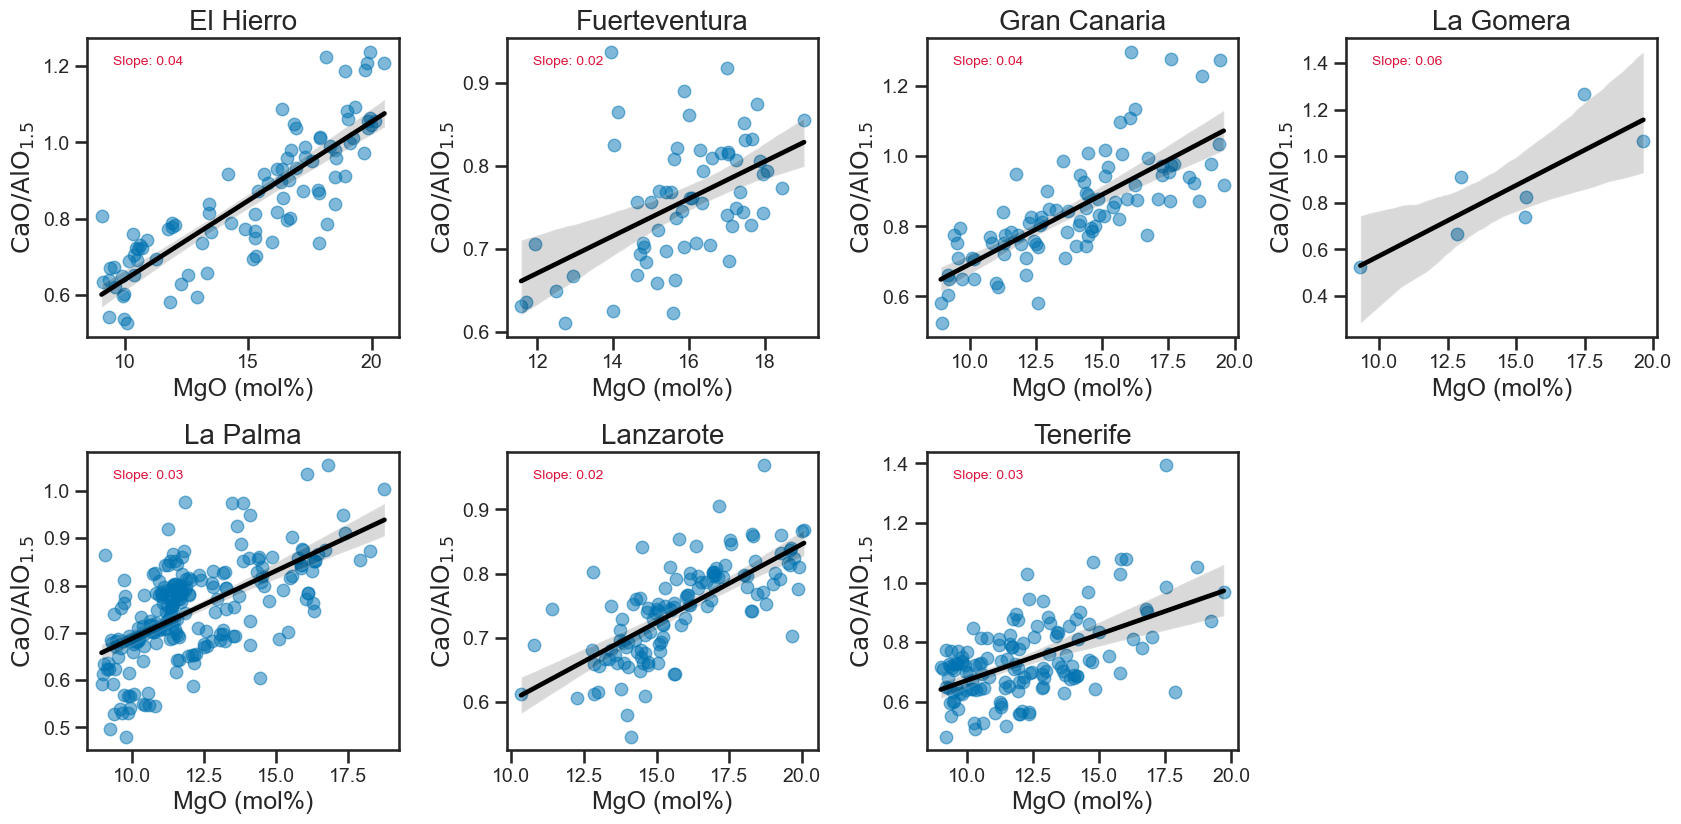

In [17]:
# plot regression figure
regression_fig(filt)

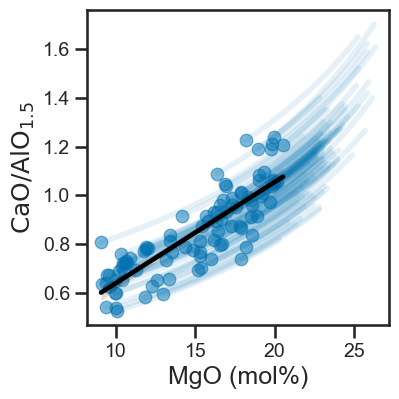

In [18]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
el_hierro_df, el_hierro_melt = crystal_fract_corr(filt[filt['Island']=='El Hierro'], 1, 0.75)
evolution_fig(filt[filt['Island']=='El Hierro'], el_hierro_melt)

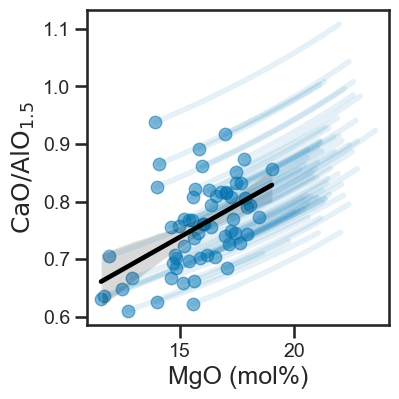

In [19]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
fuerteventura_df, fuerteventura_melt = crystal_fract_corr(filt[filt['Island']=='Fuerteventura'], 1, 0.4)
evolution_fig(filt[filt['Island']=='Fuerteventura'], fuerteventura_melt)

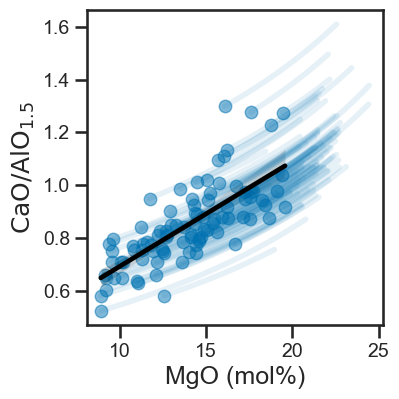

In [20]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
gran_canaria_df, gran_canaria_melt = crystal_fract_corr(filt[filt['Island']=='Gran Canaria'], 1, 0.7)
evolution_fig(filt[filt['Island']=='Gran Canaria'], gran_canaria_melt)

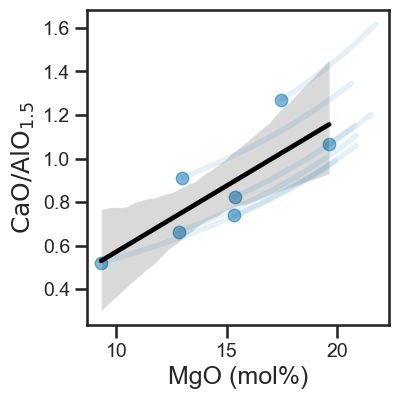

In [21]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
la_gomera_df, la_gomera_melt = crystal_fract_corr(filt[filt['Island']=='La Gomera'], 1, 1.25)
evolution_fig(filt[filt['Island']=='La Gomera'], la_gomera_melt)

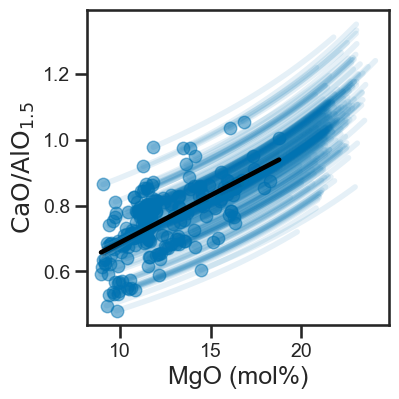

In [22]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
la_palma_df, la_palma_melt = crystal_fract_corr(filt[filt['Island']=='La Palma'], 1, 0.65)
evolution_fig(filt[filt['Island']=='La Palma'], la_palma_melt)

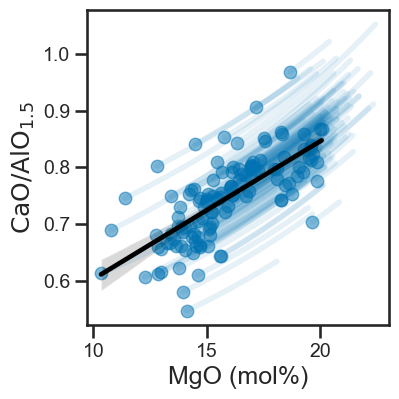

In [23]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
lanzarote_df, lanzarote_melt = crystal_fract_corr(filt[filt['Island']=='Lanzarote'], 1, 0.6)
evolution_fig(filt[filt['Island']=='Lanzarote'], lanzarote_melt)

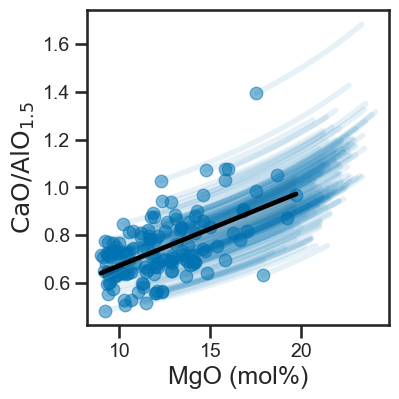

In [24]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
tenerife_df, tenerife_melt = crystal_fract_corr(filt[filt['Island']=='Tenerife'], 1, 0.7)
evolution_fig(filt[filt['Island']=='Tenerife'], tenerife_melt)

## 3. Cape Verde

In [26]:
# define hawaii dataframe
cape_verde = OIB_df[OIB_df['Group']=='Cape Verde']

# show value counts
cape_verde['Island'].value_counts()

Island
Sao Nicolao    180
Santiago       139
Boa Vista       71
Fogo            64
Sao Vicente     42
Sao Antao       42
Maio             9
Brava            3
Sal              3
Name: count, dtype: int64

In [27]:
# filter outliers
filt = outlier_filt(cape_verde)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Sao Nicolao    173
Santiago       139
Boa Vista       64
Fogo            48
Sao Vicente     41
Sao Antao       41
Name: count, dtype: int64

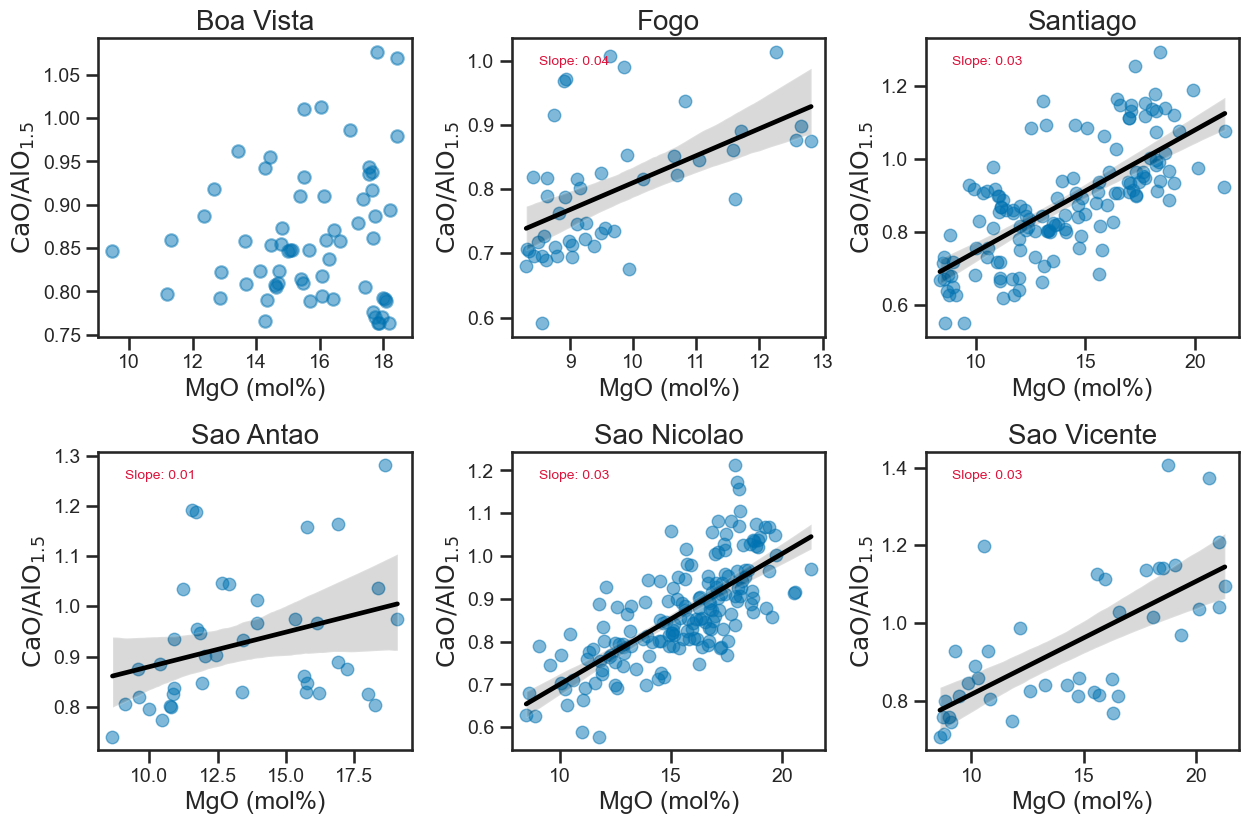

In [28]:
# plot regression figure
regression_fig(filt)

In [29]:
# correct islands without a cpx component (i.e., no coherent slope)
boa_vista_df, boa_vista_melt = crystal_fract_corr(filt[filt['Island']=='Boa Vista'], 1, 0)

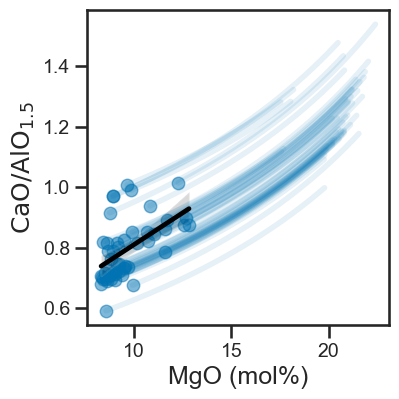

In [30]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
fogo_df, fogo_melt = crystal_fract_corr(filt[filt['Island']=='Fogo'], 1, 1)
evolution_fig(filt[filt['Island']=='Fogo'], fogo_melt)

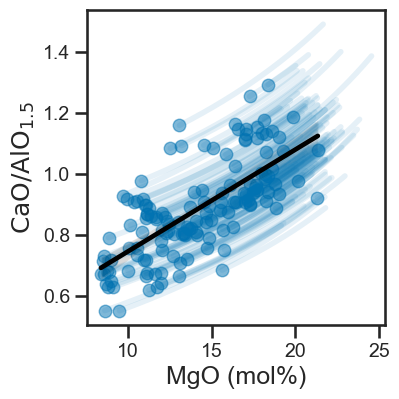

In [31]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
santiago_df, santiago_melt = crystal_fract_corr(filt[filt['Island']=='Santiago'], 1, 0.7)
evolution_fig(filt[filt['Island']=='Santiago'], santiago_melt)

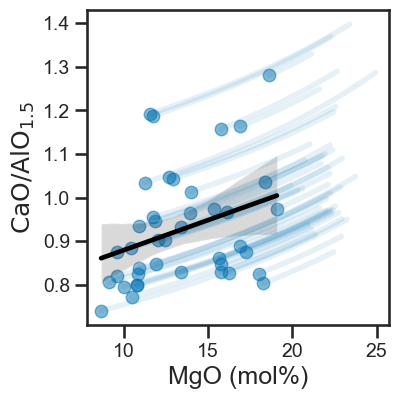

In [32]:
sao_antao_df, sao_antao_melt = crystal_fract_corr(filt[filt['Island']=='Sao Antao'], 1, 0.3)
evolution_fig(filt[filt['Island']=='Sao Antao'], sao_antao_melt)

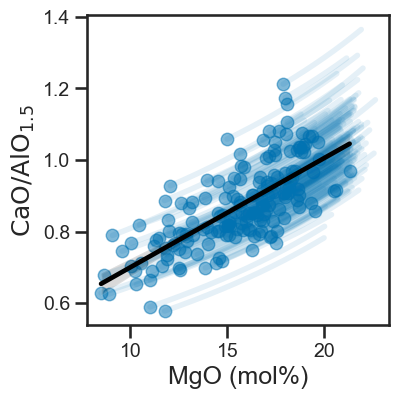

In [33]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
sao_nicolao_df, sao_nicolao_melt = crystal_fract_corr(filt[filt['Island']=='Sao Nicolao'], 1, 0.65)
evolution_fig(filt[filt['Island']=='Sao Nicolao'], sao_nicolao_melt)

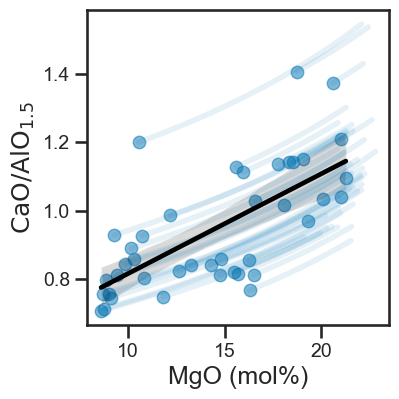

In [34]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
sao_vicente_df, sao_vicente_melt = crystal_fract_corr(filt[filt['Island']=='Sao Vicente'], 1, 0.55)
evolution_fig(filt[filt['Island']=='Sao Vicente'], sao_vicente_melt)

## 4. Iceland

In [36]:
# define hawaii dataframe
iceland = OIB_df[OIB_df['Group']=='Iceland']

# show value counts
iceland['Island'].value_counts()

Island
Iceland                              101
Vestmannaeyjar                        29
Vestmannaeyjar Islands - Ellidaey      1
Vestmannaeyjar Islands - Hellisey      1
Name: count, dtype: int64

In [37]:
# filter outliers
filt = outlier_filt(iceland)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Iceland           95
Vestmannaeyjar    25
Name: count, dtype: int64

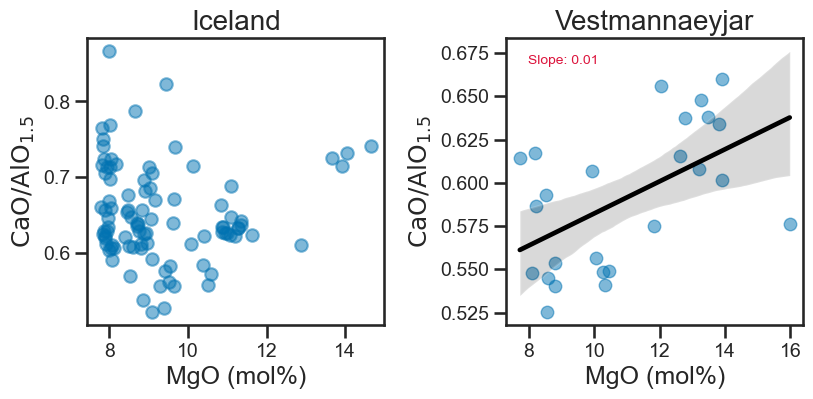

In [38]:
# plot regression figure
regression_fig(filt)

In [39]:
# correct islands without a cpx component (i.e., no coherent slope)
iceland_df, iceland_melt = crystal_fract_corr(filt[filt['Island']=='Iceland'], 1, 0)

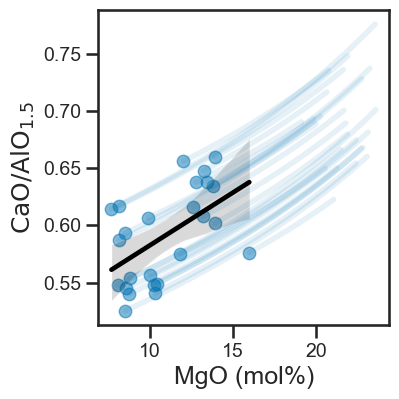

In [40]:
vestmannaeyjar_df, vestmannaeyjar_melt = crystal_fract_corr(filt[filt['Island']=='Vestmannaeyjar'], 1, 0.22)
evolution_fig(filt[filt['Island']=='Vestmannaeyjar'], vestmannaeyjar_melt)

## 5. Azores

In [42]:
# define hawaii dataframe
azores = OIB_df[OIB_df['Group']=='Azores']

# show value counts
azores['Island'].value_counts()

Island
Pico                   129
Sao Miguel             121
Sao Jorge               52
Terceira                49
Faial                   44
Graciosa                23
Flores                  18
Corvo                   17
Santa Maria             15
Hirondelle Basin         5
Pico Alto                4
D. Joao Castro Bank      3
Name: count, dtype: int64

In [43]:
# filter outliers
filt = outlier_filt(azores)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Pico           128
Sao Miguel     119
Sao Jorge       51
Terceira        49
Faial           38
Graciosa        22
Corvo           17
Flores          16
Santa Maria     13
Name: count, dtype: int64

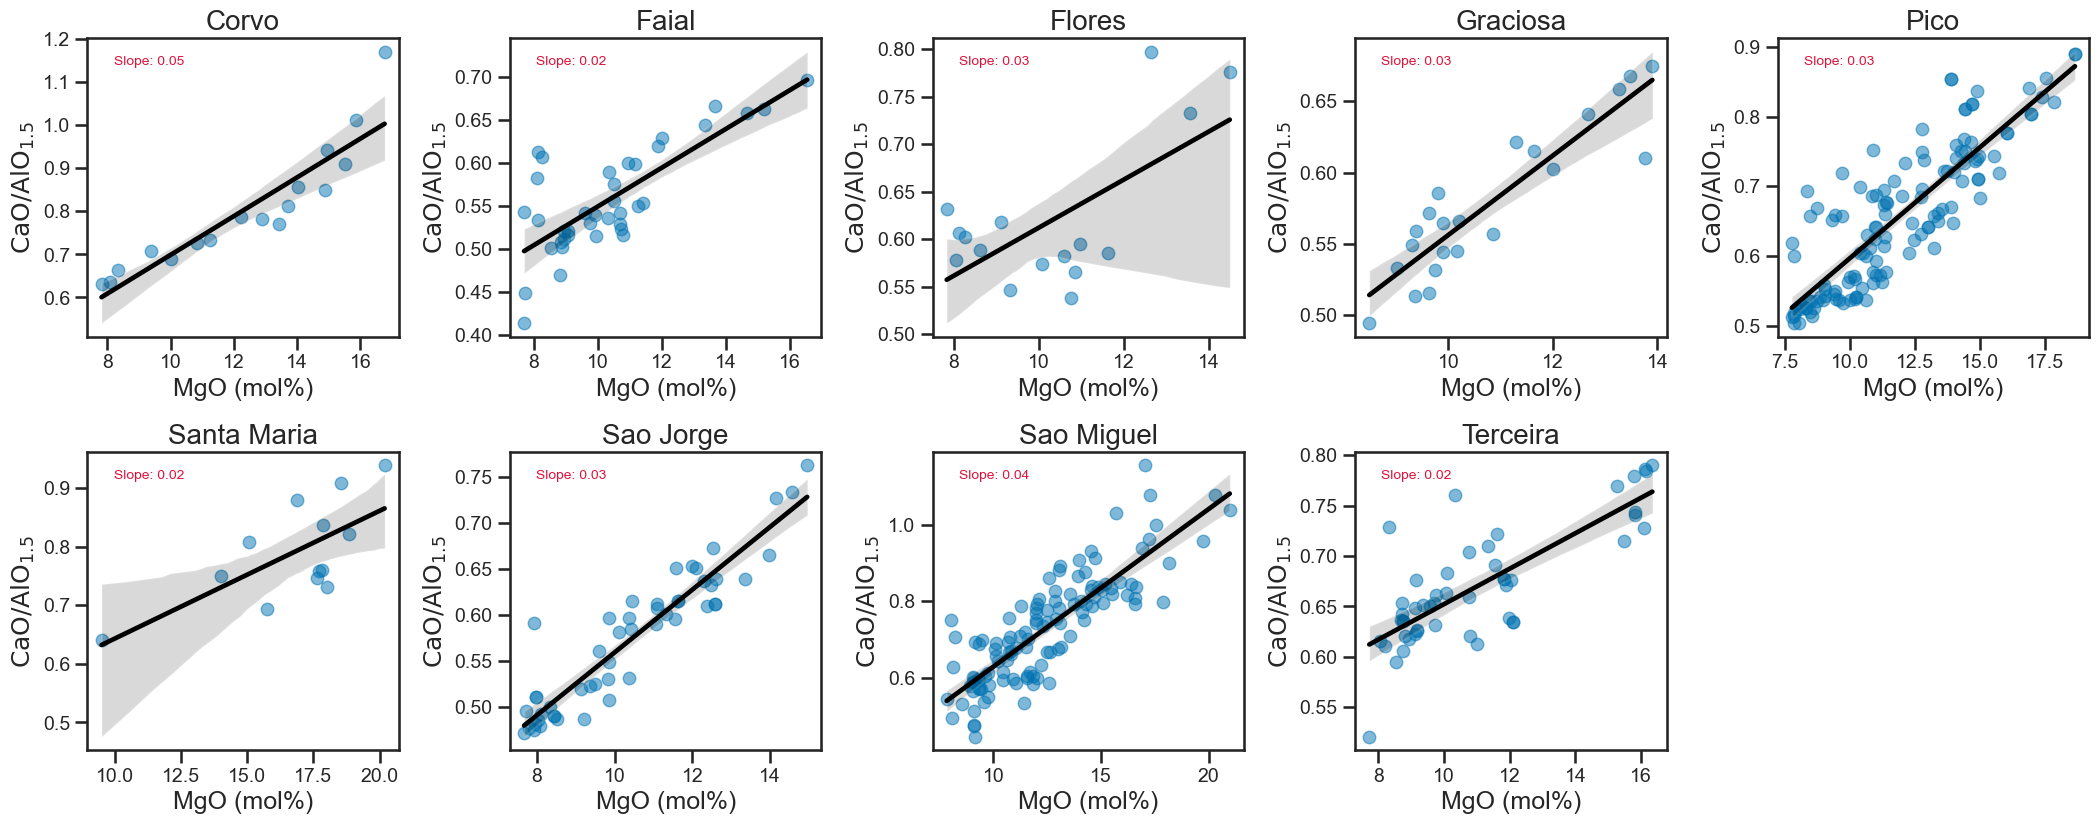

In [44]:
# plot regression figure
regression_fig(filt)

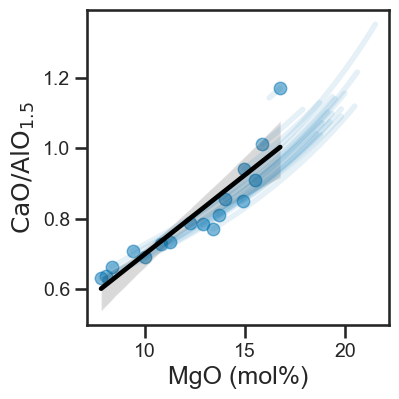

In [45]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
corvo_df, corvo_melt = crystal_fract_corr(filt[filt['Island']=='Corvo'], 1, 1.25)
evolution_fig(filt[filt['Island']=='Corvo'], corvo_melt)

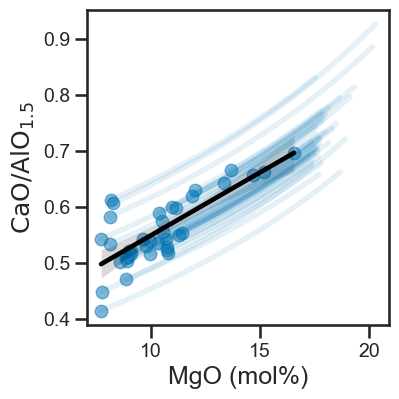

In [46]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
faial_df, faial_melt = crystal_fract_corr(filt[filt['Island']=='Faial'], 1, 0.7)
evolution_fig(filt[filt['Island']=='Faial'], faial_melt)

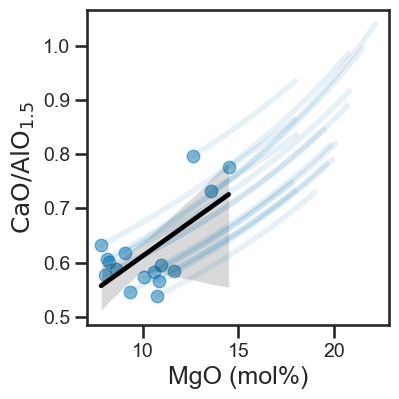

In [47]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
flores_df, flores_melt = crystal_fract_corr(filt[filt['Island']=='Flores'], 1, 0.65)
evolution_fig(filt[filt['Island']=='Flores'], flores_melt)

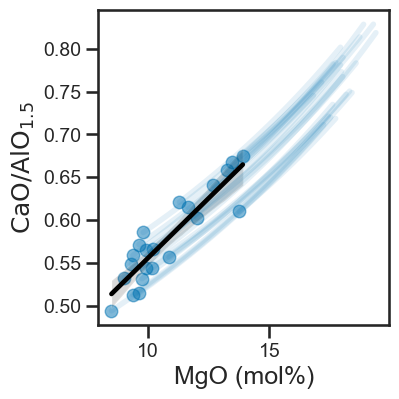

In [48]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
graciosa_df, graciosa_melt = crystal_fract_corr(filt[filt['Island']=='Graciosa'], 1, 0.80)
evolution_fig(filt[filt['Island']=='Graciosa'], graciosa_melt)

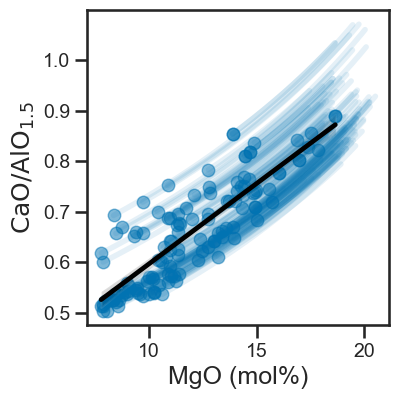

In [49]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
pico_df, pico_melt = crystal_fract_corr(filt[filt['Island']=='Pico'], 1, 0.90)
evolution_fig(filt[filt['Island']=='Pico'], pico_melt)

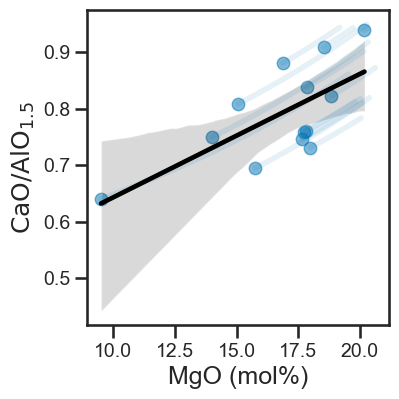

In [50]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
santa_maria_df, santa_maria_melt = crystal_fract_corr(filt[filt['Island']=='Santa Maria'], 1, 0.6)
evolution_fig(filt[filt['Island']=='Santa Maria'], santa_maria_melt)

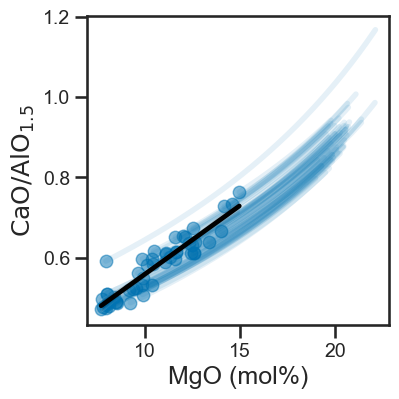

In [51]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
sao_jorge_df, sao_jorge_melt = crystal_fract_corr(filt[filt['Island']=='Sao Jorge'], 1, 0.9)
evolution_fig(filt[filt['Island']=='Sao Jorge'], sao_jorge_melt)

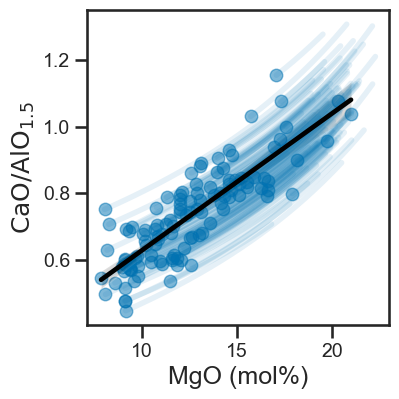

In [52]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
sao_miguel_df, sao_miguel_melt = crystal_fract_corr(filt[filt['Island']=='Sao Miguel'], 1, 1)
evolution_fig(filt[filt['Island']=='Sao Miguel'], sao_miguel_melt)

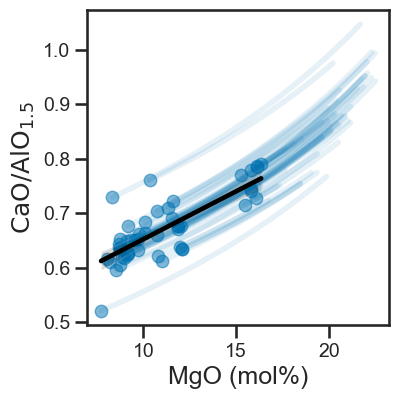

In [53]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
terceira_df, terceira_melt = crystal_fract_corr(filt[filt['Island']=='Terceira'], 1, 0.50)
evolution_fig(filt[filt['Island']=='Terceira'], terceira_melt)

## 6. Mascarene

In [55]:
# define hawaii dataframe
mascarene = OIB_df[OIB_df['Group']=='Mascarene']

# show value counts
mascarene['Island'].value_counts()

Island
Reunion      114
Mauritius    105
Rodrigues      6
Name: count, dtype: int64

In [56]:
# filter outliers
filt = outlier_filt(mascarene)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Reunion      102
Mauritius    101
Name: count, dtype: int64

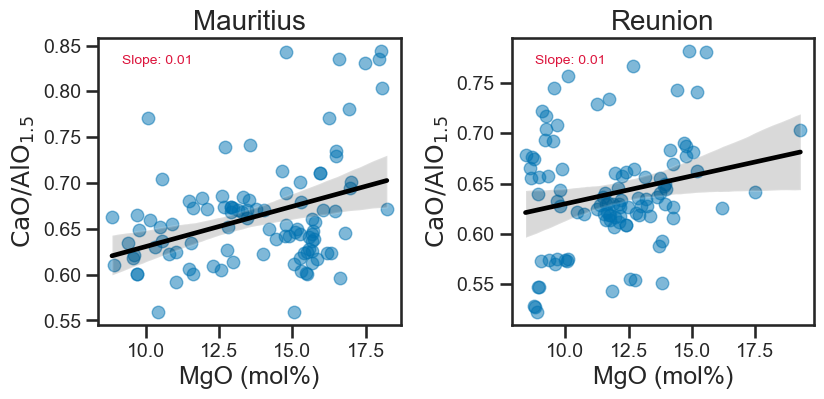

In [57]:
# plot regression figure
regression_fig(filt)

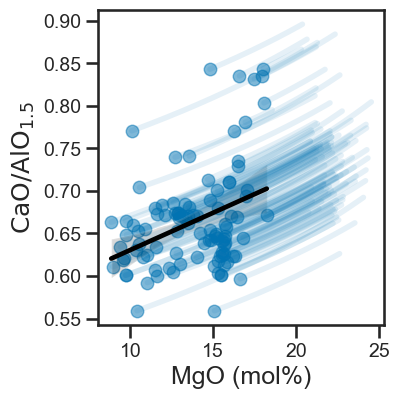

In [58]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
mauritius_df, mauritius_melt = crystal_fract_corr(filt[filt['Island']=='Mauritius'], 1, 0.2)
evolution_fig(filt[filt['Island']=='Mauritius'], mauritius_melt)

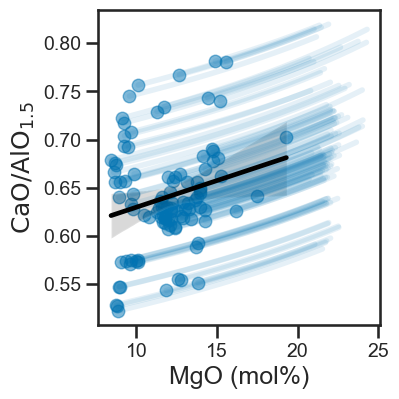

In [59]:
# correct islands without a cpx component (i.e., no coherent slope)
reunion_df, reunion_melt = crystal_fract_corr(filt[filt['Island']=='Reunion'], 1, 0.12)
evolution_fig(filt[filt['Island']=='Reunion'], reunion_melt)

## 7. Austral-Cook

In [61]:
# define hawaii dataframe
austral_cook = OIB_df[OIB_df['Group']=='Austral-Cook']

# show value counts
austral_cook['Island'].value_counts()

Island
Tubuai       53
Mangaia      35
Rurutu       17
Rarotonga    16
Raivavae     15
Aitutaki     11
Rapa          9
Atiu          6
Rimatara      1
Name: count, dtype: int64

In [62]:
# filter outliers
filt = outlier_filt(austral_cook)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# drop "Aitutaki"
filt = filt.drop(filt[filt['Island']=='Aitutaki'].index)

# show value counts after filtering
filt['Island'].value_counts()

Island
Tubuai       52
Mangaia      34
Rurutu       16
Rarotonga    15
Raivavae     14
Rapa          6
Atiu          6
Name: count, dtype: int64

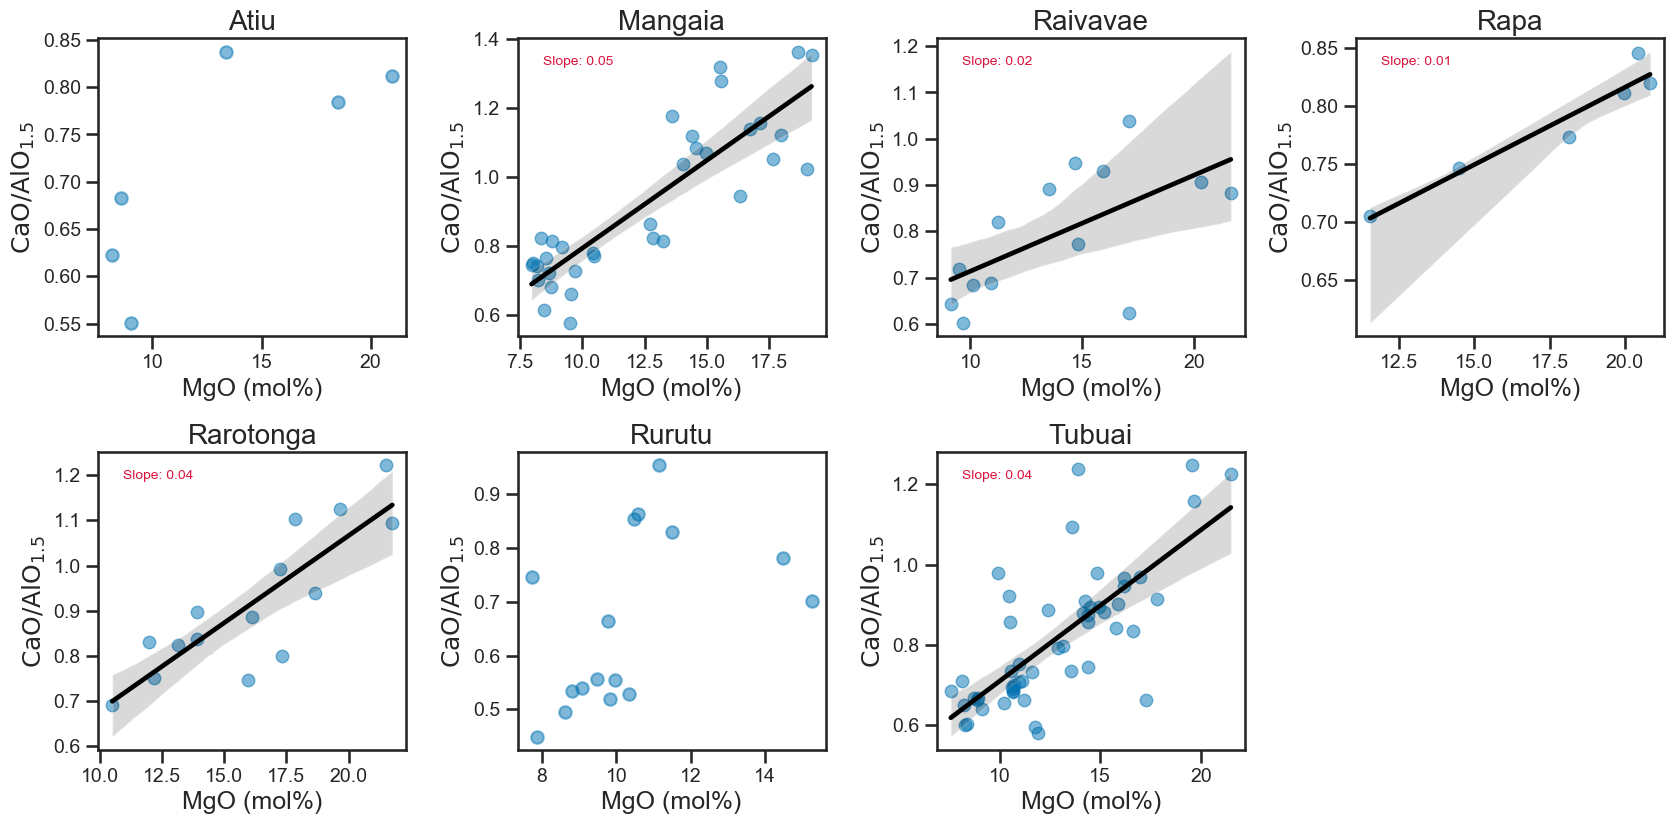

In [63]:
# plot regression figure
regression_fig(filt)

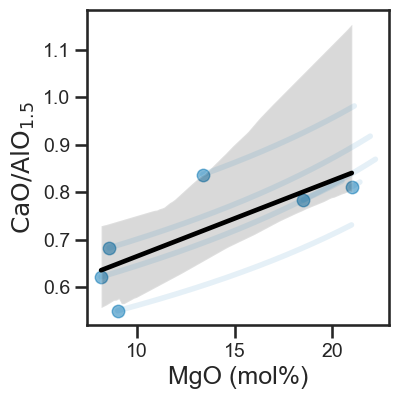

In [64]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
atiu_df, atiu_melt = crystal_fract_corr(filt[filt['Island']=='Atiu'], 1, 0.4)
evolution_fig(filt[filt['Island']=='Atiu'], atiu_melt)

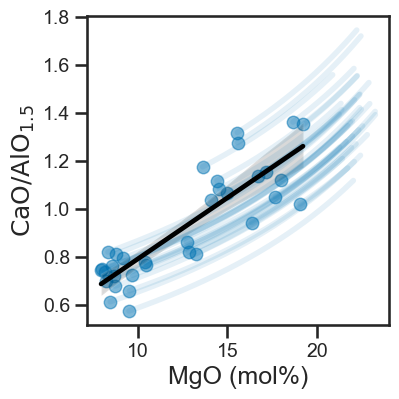

In [65]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
mangaia_df, mangaia_melt = crystal_fract_corr(filt[filt['Island']=='Mangaia'], 1, 1)
evolution_fig(filt[filt['Island']=='Mangaia'], mangaia_melt)

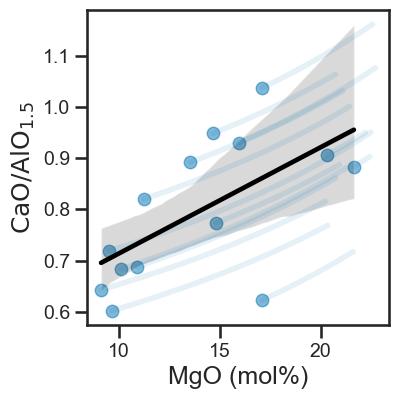

In [66]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
raivavae_df, raivavae_melt = crystal_fract_corr(filt[filt['Island']=='Raivavae'], 1, 0.4)
evolution_fig(filt[filt['Island']=='Raivavae'], raivavae_melt)

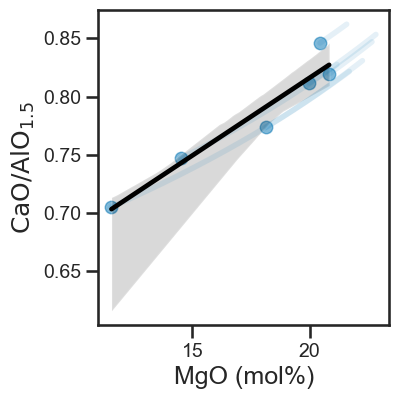

In [67]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
rapa_df, rapa_melt = crystal_fract_corr(filt[filt['Island']=='Rapa'], 1, 0.25)
evolution_fig(filt[filt['Island']=='Rapa'], rapa_melt)

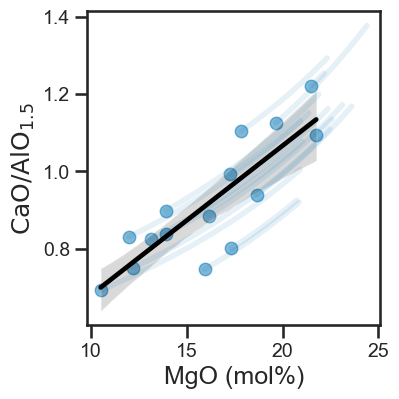

In [68]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
rarotonga_df, rarotonga_melt = crystal_fract_corr(filt[filt['Island']=='Rarotonga'], 1, 0.70)
evolution_fig(filt[filt['Island']=='Rarotonga'], rarotonga_melt)

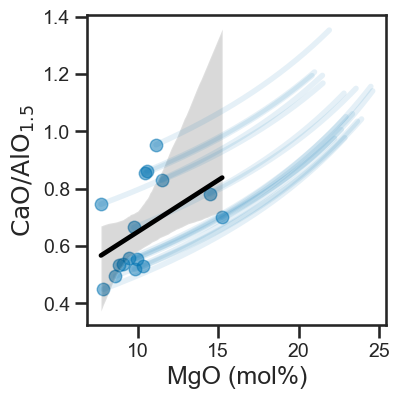

In [69]:
rurutu_df, rurutu_melt = crystal_fract_corr(filt[filt['Island']=='Rurutu'], 1, 0.75)
evolution_fig(filt[filt['Island']=='Rurutu'], rurutu_melt)

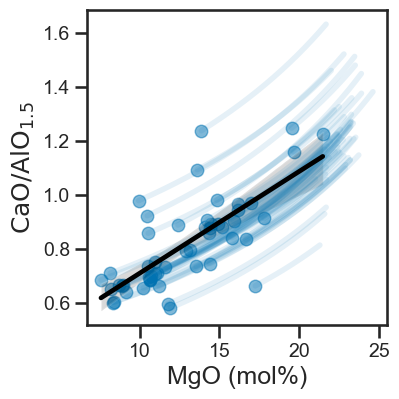

In [70]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
tubuai_df, tubuai_melt = crystal_fract_corr(filt[filt['Island']=='Tubuai'], 1, 0.80)
evolution_fig(filt[filt['Island']=='Tubuai'], tubuai_melt)

## 8. Galapagos

In [72]:
# define hawaii dataframe
galapagos = OIB_df[OIB_df['Group']=='Galapagos']

# show value counts
galapagos['Island'].value_counts()

Island
Floreana                 25
Santiago                 15
Isabela                  11
San Cristobal            11
Espanola                 10
Roca Redonda              4
Santa Fe (Barrington)     3
Santa Cruz                2
Cowley                    1
Name: count, dtype: int64

In [73]:
# filter outliers
filt = outlier_filt(galapagos)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Floreana         23
Santiago         13
San Cristobal    11
Isabela           7
Espanola          7
Name: count, dtype: int64

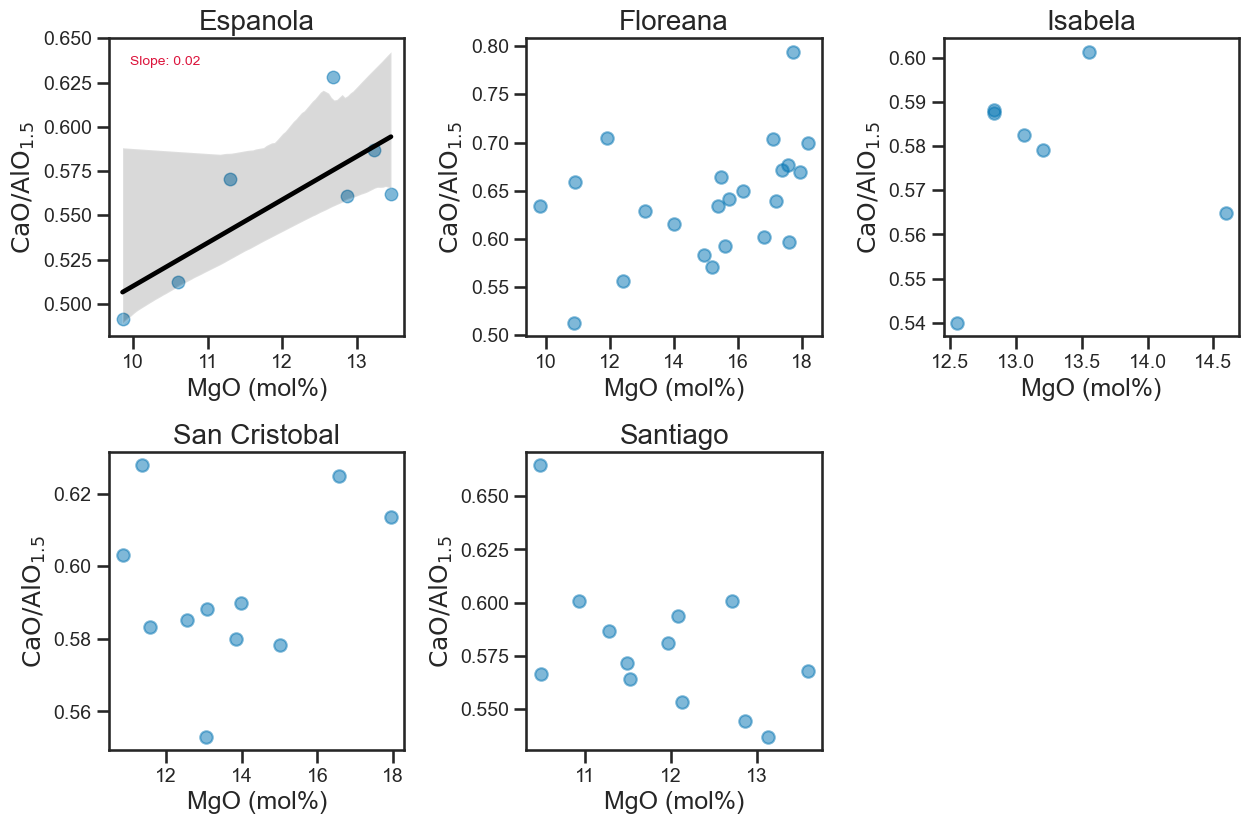

In [74]:
# plot regression figure
regression_fig(filt)

In [75]:
# correct islands without a cpx component (i.e., no coherent slope)
floreana_df, floreana_melt = crystal_fract_corr(filt[filt['Island']=='Floreana'], 1, 0)
isabela_df, isabela_melt = crystal_fract_corr(filt[filt['Island']=='Isabela'], 1, 0)
san_cristobal_df, san_cristobal_melt = crystal_fract_corr(filt[filt['Island']=='San Cristobal'], 1, 0)
santiago_df, santiago_melt = crystal_fract_corr(filt[filt['Island']=='Santiago'], 1, 0)

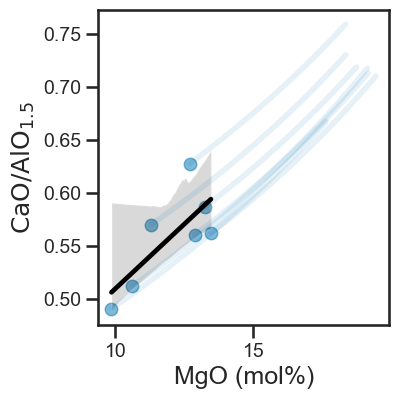

In [76]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
espanola_df, espanola_melt = crystal_fract_corr(filt[filt['Island']=='Espanola'], 1, 0.7)
evolution_fig(filt[filt['Island']=='Espanola'], espanola_melt)

## 9. Marquesas

In [78]:
# define hawaii dataframe
marquesas = OIB_df[OIB_df['Group']=='Marquesas']

# show value counts
marquesas['Island'].value_counts()

Island
Hiva Oa      36
Fatu Hiva    18
Eiao         16
Ua Pou       14
Ua Huka      10
Tahuata      10
Nuku Hiva     9
Motane        5
Fatu Huku     3
Motu Nao      2
Hatutu        1
Name: count, dtype: int64

In [79]:
# filter outliers
filt = outlier_filt(marquesas)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Hiva Oa      34
Fatu Hiva    16
Eiao         13
Ua Pou       12
Nuku Hiva     9
Tahuata       8
Ua Huka       7
Name: count, dtype: int64

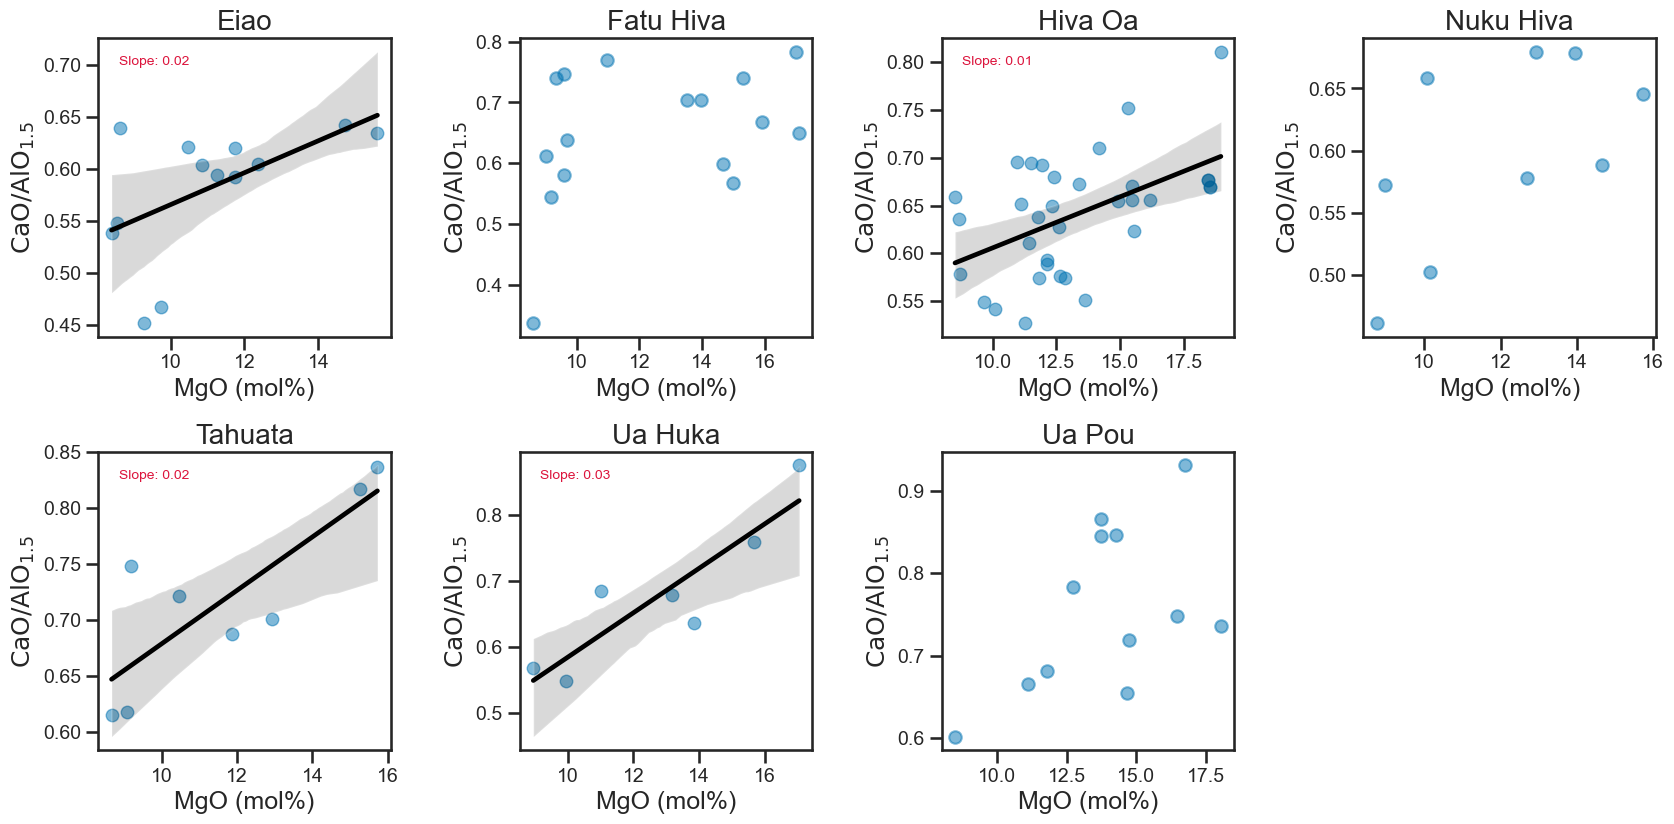

In [80]:
# plot regression figure
regression_fig(filt)

In [81]:
# correct islands without a cpx component (i.e., no coherent slope)
fatu_hiva_df, fatu_hiva_melt = crystal_fract_corr(filt[filt['Island']=='Fatu Hiva'], 1, 0)
nuku_hiva_df, nuku_hiva_melt = crystal_fract_corr(filt[filt['Island']=='Nuku Hiva'], 1, 0)
ua_pou_df, ua_pou_melt = crystal_fract_corr(filt[filt['Island']=='Ua Pou'], 1, 0)

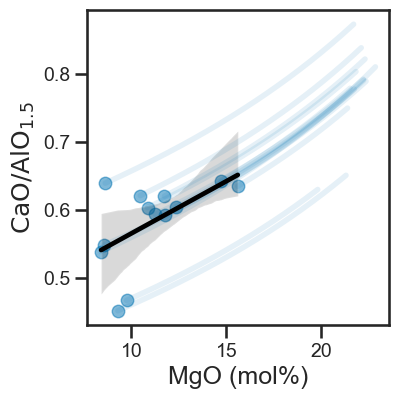

In [82]:
eiao_df, eiao_melt = crystal_fract_corr(filt[filt['Island']=='Eiao'], 1, 0.4)
evolution_fig(filt[filt['Island']=='Eiao'], eiao_melt)

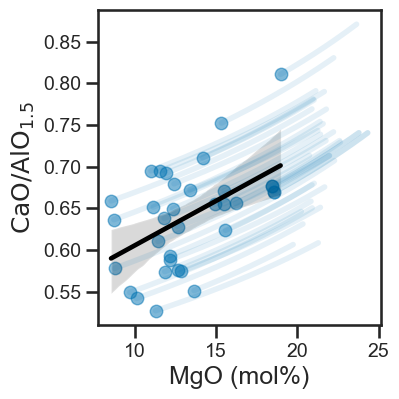

In [83]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
hiva_oa_df, hiva_oa_melt = crystal_fract_corr(filt[filt['Island']=='Hiva Oa'], 1, 0.2)
evolution_fig(filt[filt['Island']=='Hiva Oa'], hiva_oa_melt)

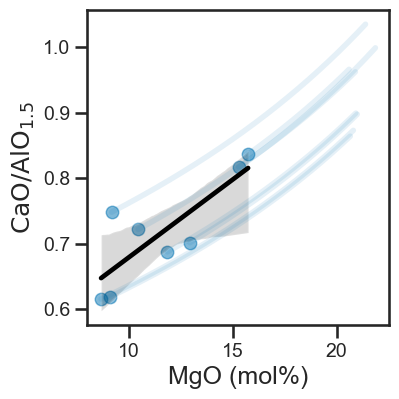

In [84]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
tahuata_df, tahuata_melt = crystal_fract_corr(filt[filt['Island']=='Tahuata'], 1, 0.5)
evolution_fig(filt[filt['Island']=='Tahuata'], tahuata_melt)

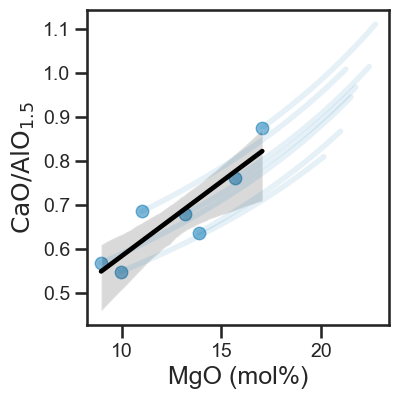

In [85]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
ua_huka_df, ua_huka_melt = crystal_fract_corr(filt[filt['Island']=='Ua Huka'], 1, 0.7)
evolution_fig(filt[filt['Island']=='Ua Huka'], ua_huka_melt)

## 10. Society

In [87]:
# define dataframe
society = OIB_df[OIB_df['Group']=='Society']

# show value counts
society['Island'].value_counts()

Island
Tahiti       30
Mehetia      29
Huahine      17
Bora Bora     8
Tahaa         5
Moorea        3
Raiatea       3
Maupiti       1
Name: count, dtype: int64

In [88]:
# filter outliers
filt = outlier_filt(society)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Tahiti       27
Mehetia      15
Huahine      14
Bora Bora     6
Name: count, dtype: int64

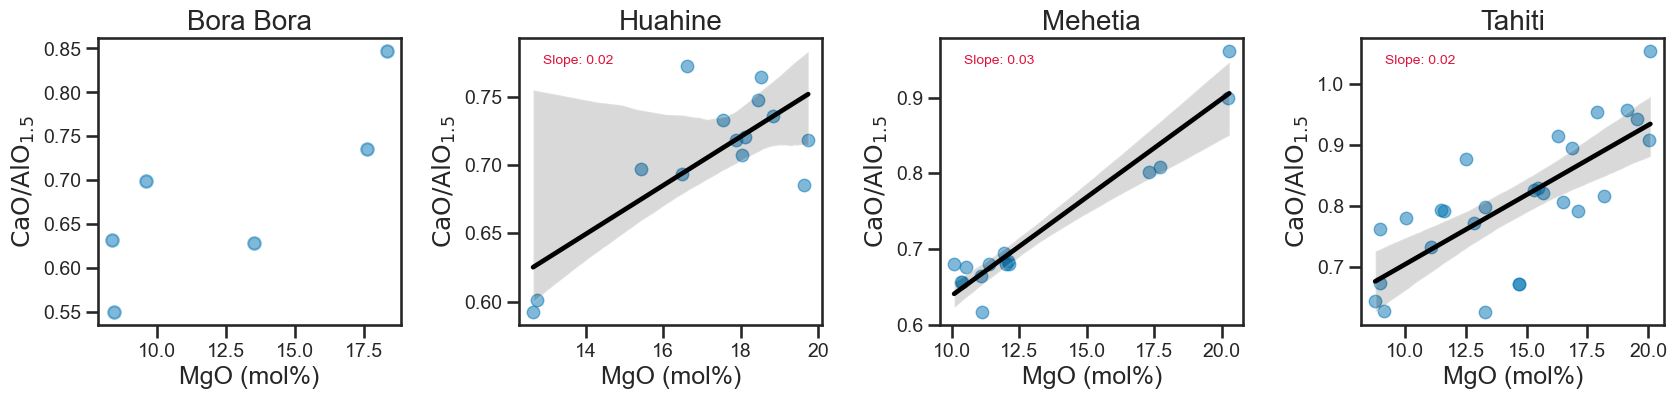

In [89]:
# plot regression figure
regression_fig(filt)

In [90]:
# correct islands without a cpx component (i.e., no coherent slope)
bora_bora_df, bora_bora_melt = crystal_fract_corr(filt[filt['Island']=='Bora Bora'], 1, 0)

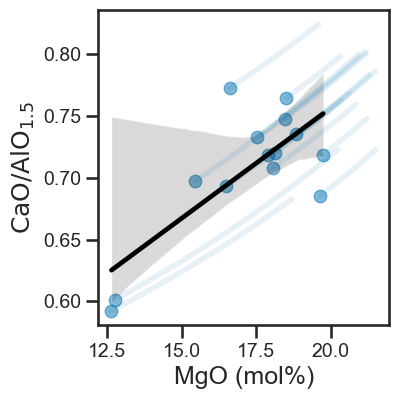

In [91]:
huahine_df, huahine_melt = crystal_fract_corr(filt[filt['Island']=='Huahine'], 1, 0.35)
evolution_fig(filt[filt['Island']=='Huahine'], huahine_melt)

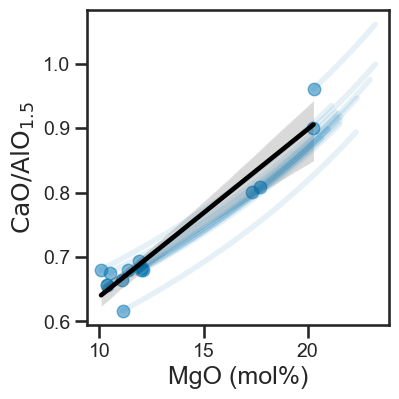

In [92]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
mehetia_df, mehetia_melt = crystal_fract_corr(filt[filt['Island']=='Mehetia'], 1, 0.5)
evolution_fig(filt[filt['Island']=='Mehetia'], mehetia_melt)

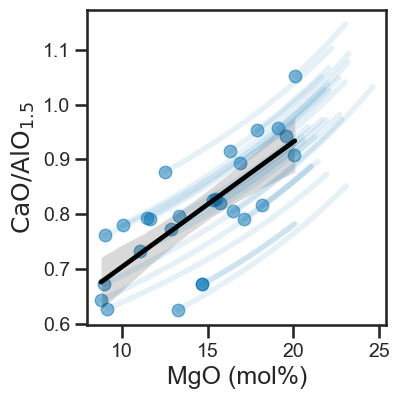

In [93]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
tahiti_df, tahiti_melt = crystal_fract_corr(filt[filt['Island']=='Tahiti'], 1, 0.45)
evolution_fig(filt[filt['Island']=='Tahiti'], tahiti_melt)

## 11. Cameroon

In [95]:
# define dataframe
cameroon = OIB_df[OIB_df['Group']=='Cameroon']

# show value counts
cameroon['Island'].value_counts()

Island
Bioko-Fernando Poo    45
Sao Tome              13
Pagalu                12
Principe               8
Name: count, dtype: int64

In [96]:
# filter outliers
filt = outlier_filt(cameroon)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Bioko-Fernando Poo    36
Pagalu                12
Sao Tome              12
Principe               6
Name: count, dtype: int64

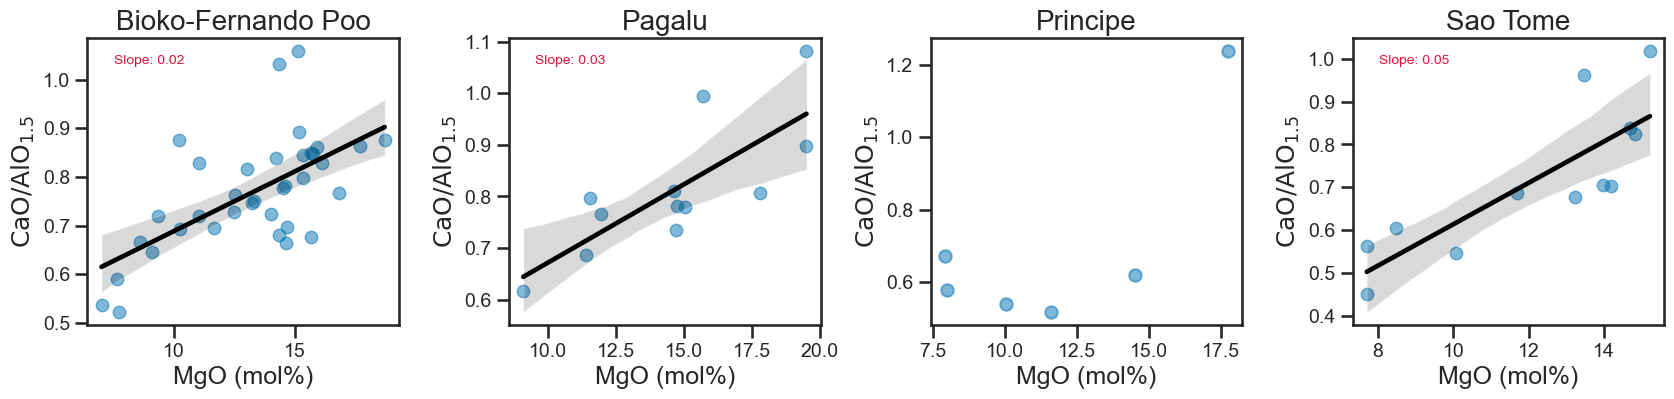

In [97]:
# plot regression figure
regression_fig(filt)

In [98]:
# correct islands without a cpx component (i.e., no coherent slope)
principe_df, principe_melt = crystal_fract_corr(filt[filt['Island']=='Principe'], 1, 0)

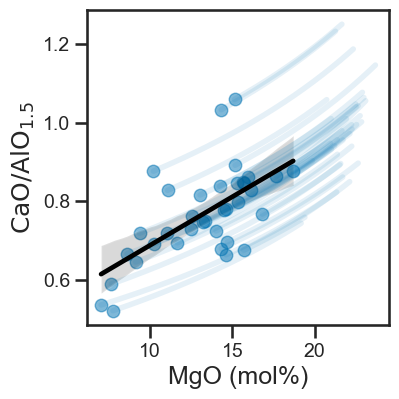

In [99]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
bioko_fernando_poo_df, bioko_fernando_poo_melt = crystal_fract_corr(filt[filt['Island']=='Bioko-Fernando Poo'], 1, 0.5)
evolution_fig(filt[filt['Island']=='Bioko-Fernando Poo'], bioko_fernando_poo_melt)

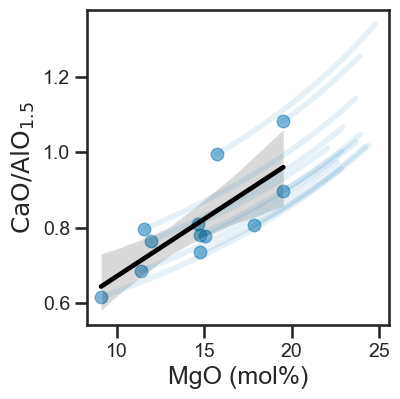

In [100]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
pagalu_df, pagalu_melt = crystal_fract_corr(filt[filt['Island']=='Pagalu'], 1, 0.5)
evolution_fig(filt[filt['Island']=='Pagalu'], pagalu_melt)

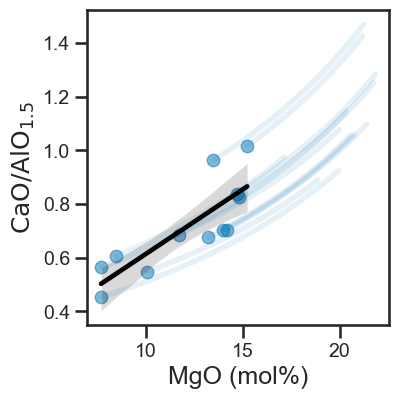

In [101]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
sao_tome_df, sao_tome_melt = crystal_fract_corr(filt[filt['Island']=='Sao Tome'], 1, 1.2)
evolution_fig(filt[filt['Island']=='Sao Tome'], sao_tome_melt)

## 12. Kerguelen

In [103]:
# define dataframe
kerguelen = OIB_df[OIB_df['Group']=='Kerguelen']

# show value counts
kerguelen['Island'].value_counts()

Island
Kerguelen    45
Foch          4
Name: count, dtype: int64

In [104]:
# filter outliers
filt = outlier_filt(kerguelen)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Kerguelen    33
Name: count, dtype: int64

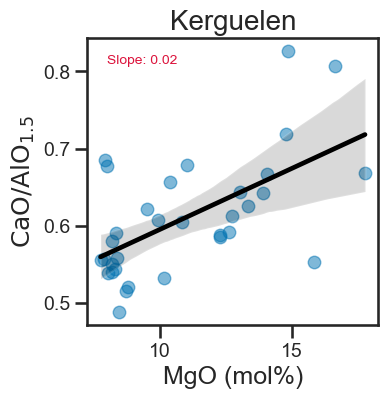

In [105]:
# plot regression figure
regression_fig(filt)

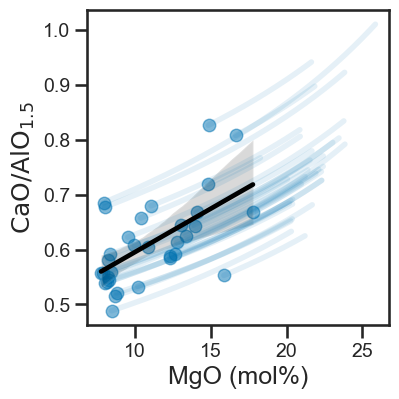

In [106]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
kerguelen_df, kerguelen_melt = crystal_fract_corr(filt[filt['Island']=='Kerguelen'], 1, 0.3)
evolution_fig(filt[filt['Island']=='Kerguelen'], kerguelen_melt)

## 13. Juan Fernandez

In [108]:
# define dataframe
juan_fernandez = OIB_df[OIB_df['Group']=='Juan Fernandez']

# show value counts
juan_fernandez['Island'].value_counts()

Island
Robinson Crusoe      29
Alexander Selkirk     7
Name: count, dtype: int64

In [109]:
# filter outliers
filt = outlier_filt(juan_fernandez)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Robinson Crusoe      28
Alexander Selkirk     7
Name: count, dtype: int64

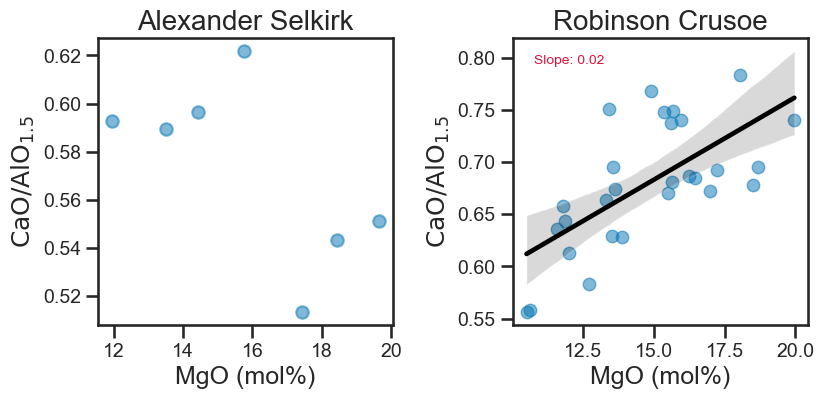

In [110]:
# plot regression figure
regression_fig(filt)

In [111]:
# correct islands without a cpx component (i.e., no coherent slope)
alexander_selkirk_df, alexander_selkirk_melt = crystal_fract_corr(filt[filt['Island']=='Alexander Selkirk'], 1, 0)

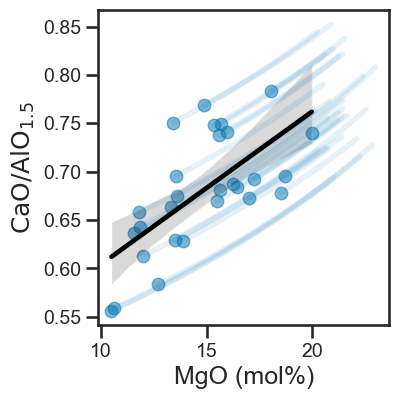

In [112]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
robinson_crusoe_df, robinson_crusoe_melt = crystal_fract_corr(filt[filt['Island']=='Robinson Crusoe'], 1, 0.3)
evolution_fig(filt[filt['Island']=='Robinson Crusoe'], robinson_crusoe_melt)

## 14. Heard

In [114]:
# define dataframe
heard = OIB_df[OIB_df['Group']=='Heard']

# show value counts
heard['Island'].value_counts()

Island
Heard    40
Name: count, dtype: int64

In [115]:
# filter outliers
filt = outlier_filt(heard)

# show value counts after filtering
filt['Island'].value_counts()

Island
Heard    39
Name: count, dtype: int64

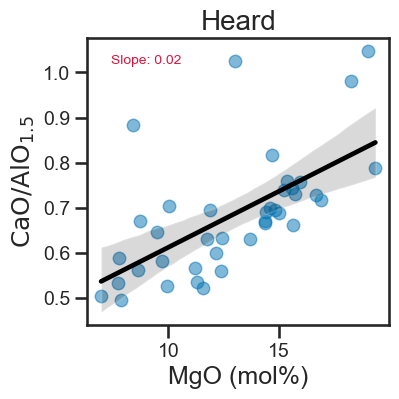

In [116]:
# plot regression figure
regression_fig(filt)

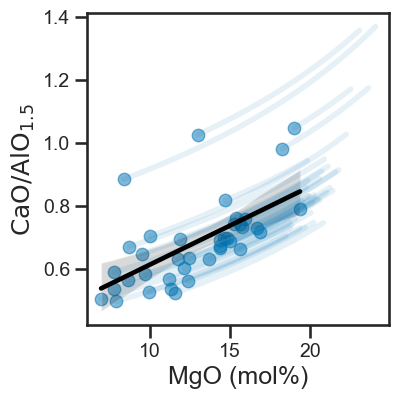

In [117]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
heard_df, heard_melt = crystal_fract_corr(filt[filt['Island']=='Heard'], 1, 0.5)
evolution_fig(filt[filt['Island']=='Heard'], heard_melt)

## 15. Jan Mayen

In [119]:
# define dataframe
jan_mayen = OIB_df[OIB_df['Group']=='Jan Mayen']

# show value counts
jan_mayen['Island'].value_counts()

Island
Jan Mayen    123
Name: count, dtype: int64

In [120]:
# filter outliers
filt = outlier_filt(jan_mayen)

# show value counts after filtering
filt['Island'].value_counts()

Island
Jan Mayen    119
Name: count, dtype: int64

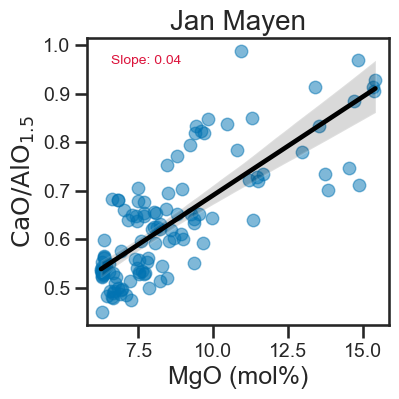

In [121]:
# plot regression figure
regression_fig(filt)

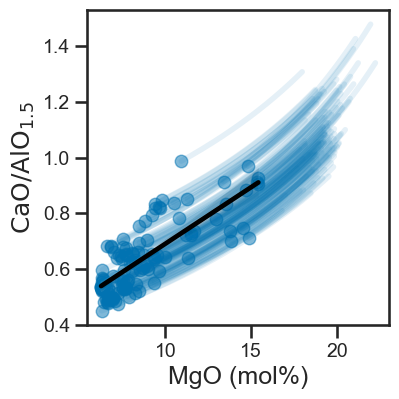

In [122]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
jan_mayen_df, jan_mayen_melt = crystal_fract_corr(filt[filt['Island']=='Jan Mayen'], 1, 1.2)
evolution_fig(filt[filt['Island']=='Jan Mayen'], jan_mayen_melt)

## 16. Crozet

In [124]:
# define dataframe
crozet = OIB_df[OIB_df['Group']=='Crozet']

# show value counts
crozet['Island'].value_counts()

Island
Ile De L'Est            41
Ile De La Possession     4
Name: count, dtype: int64

In [125]:
# filter outliers
filt = outlier_filt(crozet)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Ile De L'Est    40
Name: count, dtype: int64

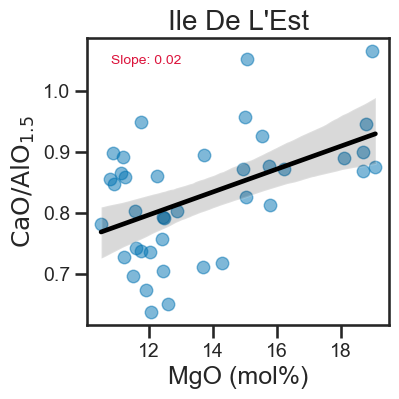

In [126]:
# plot regression figure
regression_fig(filt)

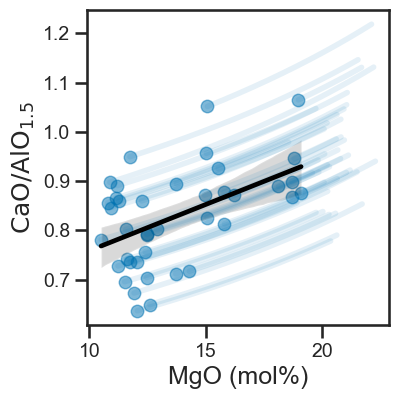

In [127]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
ile_de_lest_df, ile_de_lest_melt = crystal_fract_corr(filt[filt['Island']=="Ile De L'Est"], 1, 0.4)
evolution_fig(filt[filt['Island']=="Ile De L'Est"], ile_de_lest_melt)

## 17. Pitcairn-Gambier

In [129]:
# define dataframe
pitcairn_gambier = OIB_df[OIB_df['Group']=='Pitcairn-Gambier']

# show value counts
pitcairn_gambier['Island'].value_counts()

Island
Pitcairn    27
Name: count, dtype: int64

In [130]:
# filter outliers
filt = outlier_filt(pitcairn_gambier)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) >= 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Pitcairn    26
Name: count, dtype: int64

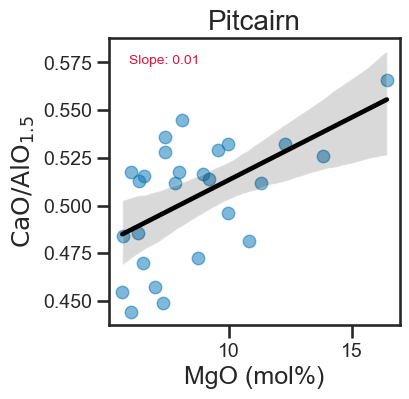

In [131]:
# plot regression figure
regression_fig(filt)

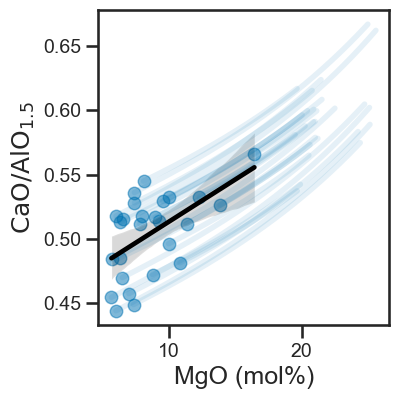

In [132]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
pitcairn_df, pitcairn_melt = crystal_fract_corr(filt[filt['Island']=='Pitcairn'], 1, 0.15)
evolution_fig(filt[filt['Island']=='Pitcairn'], pitcairn_melt)

## 18. Caroline

In [134]:
# define dataframe
caroline = OIB_df[OIB_df['Group']=='Caroline']

# show value counts
caroline['Island'].value_counts()

Island
Ponape    33
Chuuk     11
Kusaie     3
Kosrae     2
Kitiu      1
Nanue      1
Name: count, dtype: int64

In [135]:
# filter outliers
filt = outlier_filt(caroline)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Ponape    29
Chuuk      9
Name: count, dtype: int64

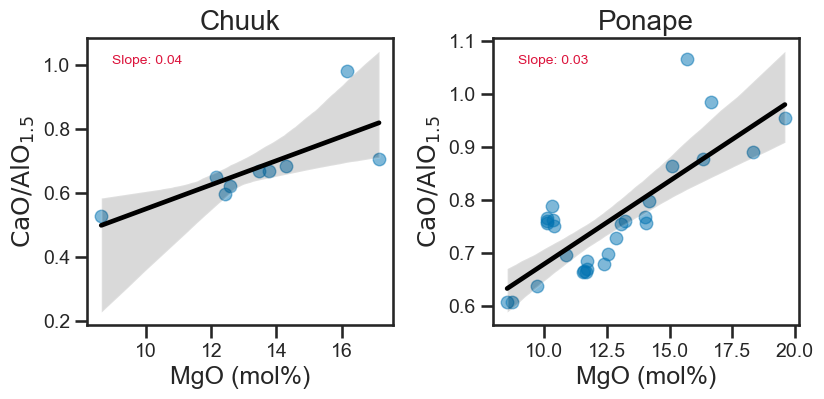

In [136]:
# plot regression figure
regression_fig(filt)

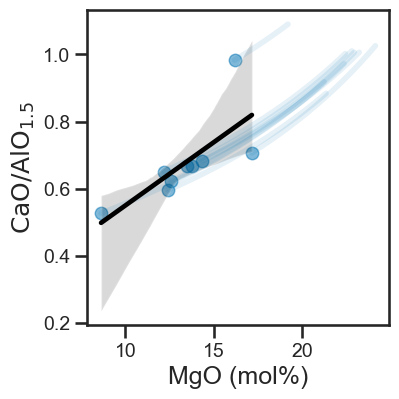

In [137]:
# correct islands without a cpx component (i.e., no coherent slope)
chuuk_df, chuuk_melt = crystal_fract_corr(filt[filt['Island']=='Chuuk'], 1, 0.75)
evolution_fig(filt[filt['Island']=='Chuuk'], chuuk_melt)

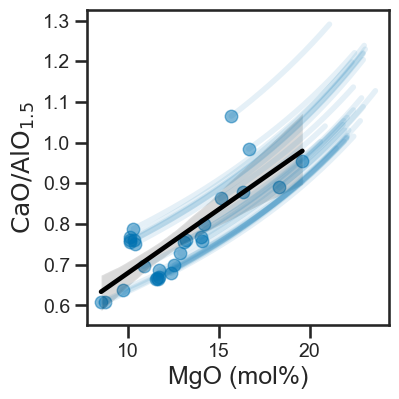

In [138]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
ponape_df, ponape_melt = crystal_fract_corr(filt[filt['Island']=='Ponape'], 1, 0.7)
evolution_fig(filt[filt['Island']=='Ponape'], ponape_melt)

## 19. St. Helena

In [140]:
# define dataframe
st_helena = OIB_df[OIB_df['Group']=='St. Helena']

# show value counts
st_helena['Island'].value_counts()

Island
St. Helena    52
Name: count, dtype: int64

In [141]:
# filter outliers
filt = outlier_filt(st_helena)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
St. Helena    49
Name: count, dtype: int64

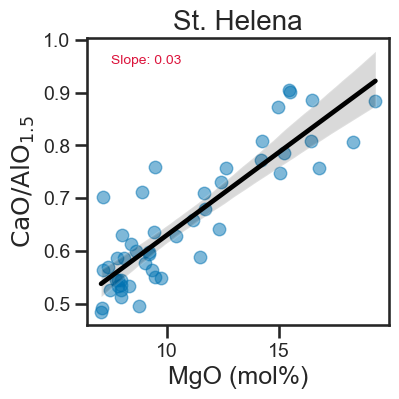

In [142]:
# plot regression figure
regression_fig(filt)

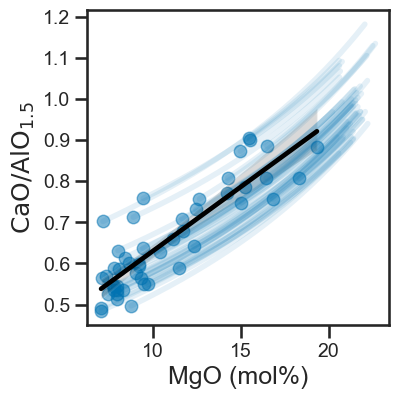

In [143]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
st_helena_df, st_helena_melt = crystal_fract_corr(filt[filt['Island']=='St. Helena'], 1, 0.75)
evolution_fig(filt[filt['Island']=='St. Helena'], st_helena_melt)

## 20. Gough

In [145]:
# define dataframe
gough = OIB_df[OIB_df['Group']=='Gough']

# show value counts
gough['Island'].value_counts()

Island
Gough    40
Name: count, dtype: int64

In [146]:
# filter outliers
filt = outlier_filt(gough)

# show value counts after filtering
filt['Island'].value_counts()

Island
Gough    36
Name: count, dtype: int64

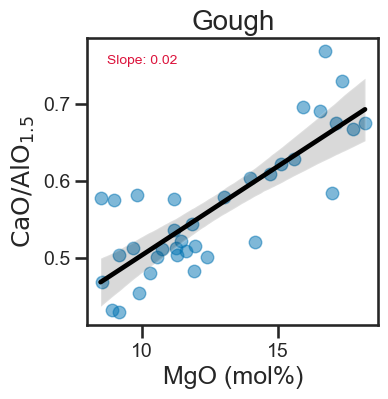

In [147]:
# plot regression figure
regression_fig(filt)

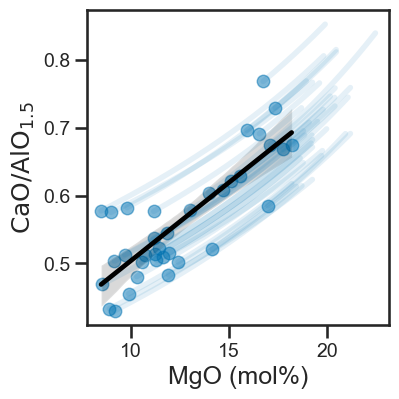

In [148]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
gough_df, gough_melt = crystal_fract_corr(filt[filt['Island']=='Gough'], 1, 0.50)
evolution_fig(filt[filt['Island']=='Gough'], gough_melt)

## 21. Tristan da Cunha

In [150]:
# define dataframe
tristan_da_cunha = OIB_df[OIB_df['Group']=='Tristan da Cunha']

# show value counts
tristan_da_cunha['Island'].value_counts()

Island
Tristan Da Cunha    27
Inaccessible         7
Name: count, dtype: int64

In [151]:
# filter outliers
filt = outlier_filt(tristan_da_cunha)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Tristan Da Cunha    23
Name: count, dtype: int64

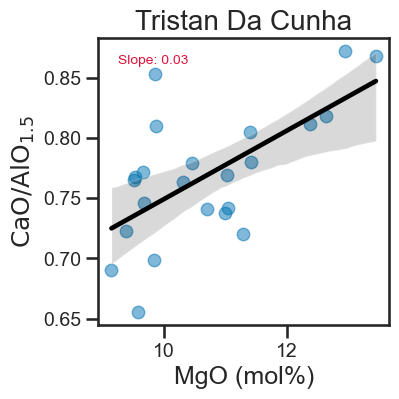

In [152]:
# plot regression figure
regression_fig(filt)

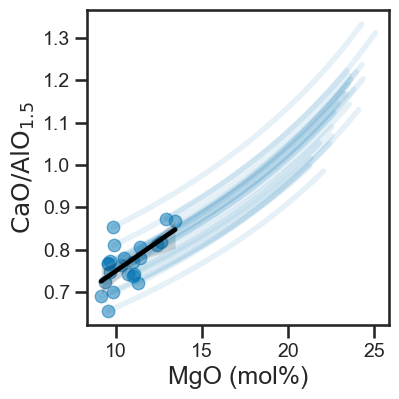

In [153]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
tristan_da_cunha_df, tristan_da_cunha_melt = crystal_fract_corr(filt[filt['Island']=='Tristan Da Cunha'], 1, 0.6)
evolution_fig(filt[filt['Island']=='Tristan Da Cunha'], tristan_da_cunha_melt)

## 22. Trindade

In [155]:
# define dataframe
trindade = OIB_df[OIB_df['Group']=='Trindade']

# show value counts
trindade['Island'].value_counts()

Island
Trindade    15
Name: count, dtype: int64

In [156]:
# filter outliers
filt = outlier_filt(trindade)

# show value counts after filtering
filt['Island'].value_counts()

Island
Trindade    13
Name: count, dtype: int64

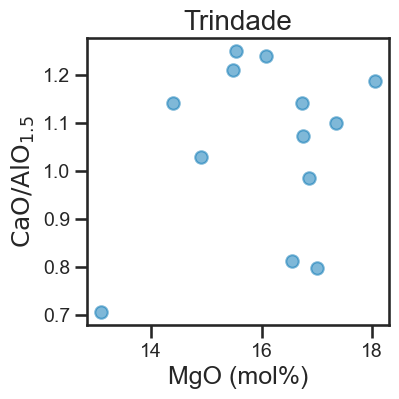

In [157]:
# plot regression figure
regression_fig(filt)

In [158]:
# correct islands without a cpx component (i.e., no coherent slope)
trindade_df, trindade_melt = crystal_fract_corr(filt[filt['Island']=='Trindade'], 1, 0)

## 23. Madeira

In [160]:
# define dataframe
madeira = OIB_df[OIB_df['Group']=='Madeira']

# show value counts
madeira['Island'].value_counts()

Island
Madeira             33
Desertas Islands    19
Porto Santo          4
Name: count, dtype: int64

In [161]:
# filter outliers
filt = outlier_filt(madeira)

# keep only islands with >5 data points
grouped = filt.groupby('Island')
filt = grouped.filter(lambda group: len(group) > 5)

# show value counts after filtering
filt['Island'].value_counts()

Island
Madeira             26
Desertas Islands    19
Name: count, dtype: int64

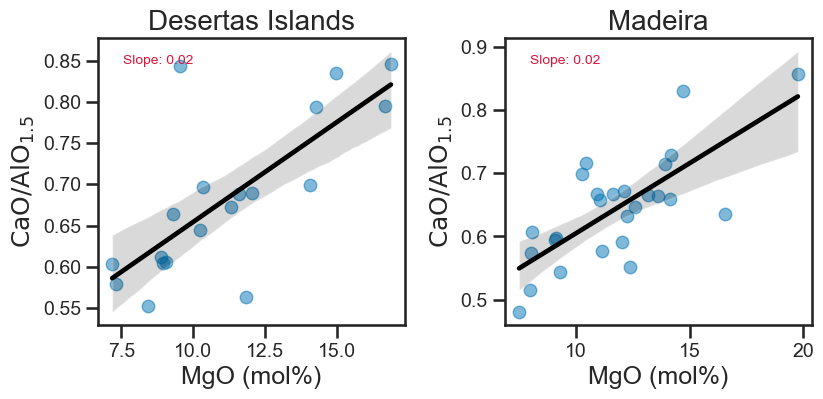

In [162]:
# plot regression figure
regression_fig(filt)

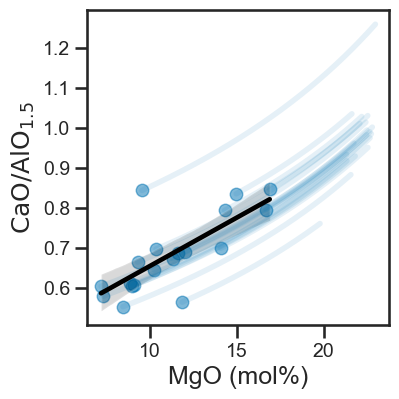

In [163]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
desertas_island_df, desertas_island_melt = crystal_fract_corr(filt[filt['Island']=='Desertas Islands'], 1, 0.6)
evolution_fig(filt[filt['Island']=='Desertas Islands'], desertas_island_melt)

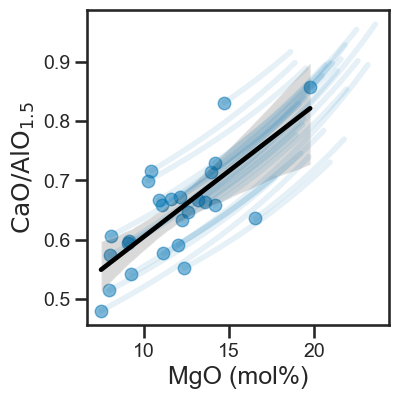

In [164]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
madeira_df, madeira_melt = crystal_fract_corr(filt[filt['Island']=='Madeira'], 1, 0.55)
evolution_fig(filt[filt['Island']=='Madeira'], madeira_melt)

## 24. Easter

In [166]:
# define dataframe
easter = OIB_df[OIB_df['Group']=='Easter']

# show value counts
easter['Island'].value_counts()

Island
Easter    5
Name: count, dtype: int64

In [167]:
# filter outliers
filt = outlier_filt(easter)

# show value counts after filtering
filt['Island'].value_counts()

Island
Easter    4
Name: count, dtype: int64

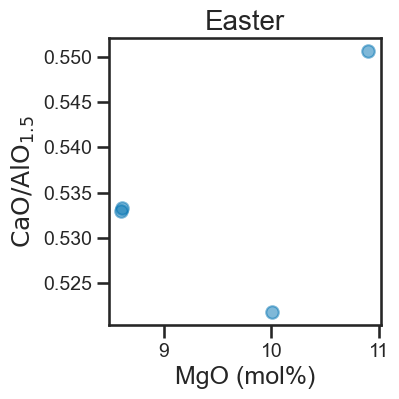

In [168]:
# plot regression figure
regression_fig(filt)

In [169]:
# correct islands without a cpx component (i.e., no coherent slope)
easter_df, easter_melt = crystal_fract_corr(filt[filt['Island']=='Easter'], 1, 0)

## 25. Samoa

In [171]:
# define dataframe
samoa_df = OIB_df[OIB_df['Group']=='Samoa']

# show value counts
samoa_df['Island'].value_counts()

Island
Tutuila          48
Upolu            36
Savai^I          35
Manua Islands    32
Name: count, dtype: int64

In [172]:
# filter outliers
filt = outlier_filt(samoa_df)

# show value counts after filtering
filt['Island'].value_counts()

Island
Tutuila          44
Upolu            36
Savai^I          33
Manua Islands    32
Name: count, dtype: int64

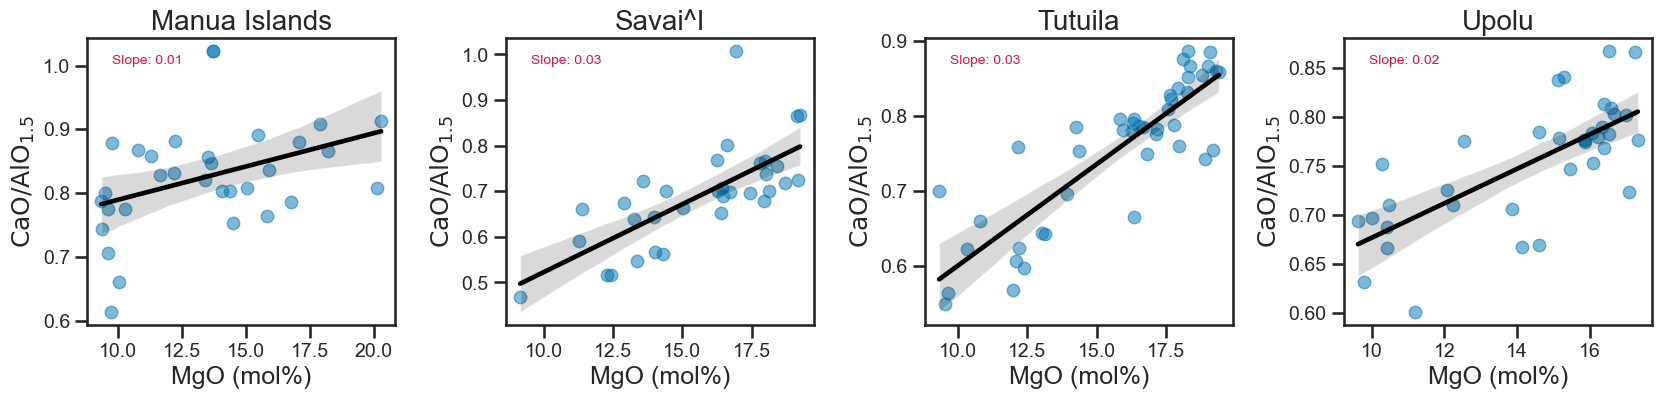

In [173]:
# plot regression figure
regression_fig(filt)

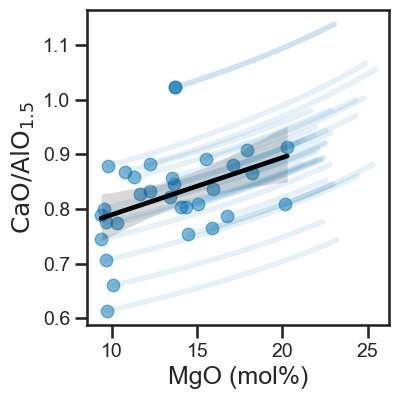

In [174]:
# correct islands without a cpx component (i.e., no coherent slope)
manua_df, manua_melt = crystal_fract_corr(filt[filt['Island']=='Manua Islands'], 1, 0.2)
evolution_fig(filt[filt['Island']=='Manua Islands'], manua_melt)

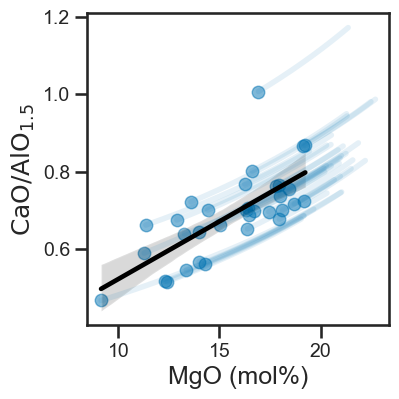

In [175]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
savai_df, savai_melt = crystal_fract_corr(filt[filt['Island']=='Savai^I'], 1, 0.60)
evolution_fig(filt[filt['Island']=='Savai^I'], savai_melt)

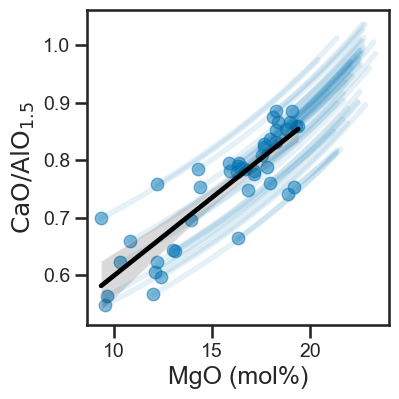

In [176]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
tutuila_df, tutuila_melt = crystal_fract_corr(filt[filt['Island']=='Tutuila'], 1, 0.55)
evolution_fig(filt[filt['Island']=='Tutuila'], tutuila_melt)

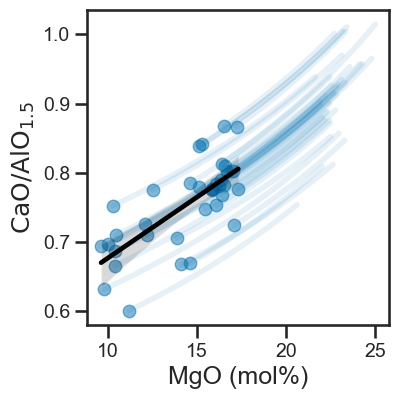

In [177]:
# individually correct islands with a cpx component (i.e., a coherent, positive slope)
upolu_df, upolu_melt = crystal_fract_corr(filt[filt['Island']=='Upolu'], 1, 0.35)
evolution_fig(filt[filt['Island']=='Upolu'], upolu_melt)